#**Machine Learning Security Project - Project 1**
###**Student: Lello Molinario (70/90/00369)**

**Instructions**

Re-evaluate 5 RobustBench models with another attack algorithm (e.g. FMN) and identify samples for which one attack works and the other doesn't. Explain the results - i.e., provide some motivations on why one of the attacks did not work properly, while the other did.


**Execution**

In order to re-evaluate 5 RobustBench models I chose "SuperDeepFool" as the attack algorithm because it is the subject of study related to the paper https://arxiv.org/pdf/2303.12481 and presented in the first part of this exam

# **Step 1: Installing libraries and resolving incompatibilities**

In order to avoid possible incompatibilities between the various libraries and the development environment, a preliminary analysis was performed.

In order to prevent incompatibilities between the "robustbench" and "SuperDeepfool" libraries, the following libraries are imposed:

numpy==1.23.5

matplotlib==3.5.3

In [ ]:
!pip install git+https://github.com/RobustBench/robustbench

  Cloning https://github.com/RobustBench/robustbench to /tmp/pip-req-build-ojblk857
  Running command git clone --filter=blob:none --quiet https://github.com/RobustBench/robustbench /tmp/pip-req-build-ojblk857
  Resolved https://github.com/RobustBench/robustbench to commit 46a91f44524133b2cd8f721ec7e73ecb63f17fc8
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fra31/auto-attack.git (to revision a39220048b3c9f2cca9a4d3a54604793c68eca7e) to /tmp/pip-install-s7e1e7hz/autoattack_7ee77811470f4d22a5feb74f26501ff5
  Running command git clone --filter=blob:none --quiet https://github.com/fra31/auto-attack.git /tmp/pip-install-s7e1e7hz/autoattack_7ee77811470f4d22a5feb74f26501ff5
  Running command git rev-parse -q --verify 'sha^a39220048b3c9f2cca9a4d3a54604793c68eca7e'
  Running command git fetch -q https://github.com/fra31/auto-attack.git a39220048b3c9f2cca9a4d3a54604793c68eca7e
  Resolved https://github.com/fra31/auto-attack.git to commit a39220048b3c9f2cca9a4d3a54604793c

In [ ]:
import os
import sys

# Controllare se la directory esiste e clonare il repository se necessario
if not os.path.exists('/content/SuperDeepFool'):
    !git clone https://github.com/alirezaabdollahpour/SuperDeepFool.git /content/SuperDeepFool


# Modificare il file requirements.txt per ignorare le versioni specifiche non compatibili
!sed -i '/numpy==1.19.0/d' SuperDeepFool/requirements.txt
!sed -i '/matplotlib==3.4.2/d' SuperDeepFool/requirements.txt

# Installare il resto delle dipendenze
!pip install -r SuperDeepFool/requirements.txt

Cloning into '/content/SuperDeepFool'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 319 (delta 70), reused 120 (delta 45), pack-reused 169 (from 1)
Receiving objects: 100% (319/319), 1.32 MiB | 1.46 MiB/s, done.
Resolving deltas: 100% (161/161), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement robustbench==0.1 (from versions: none)
ERROR: No matching distribution found for robustbench==0.1


In [ ]:
!pip install secml foolbox



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 51.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.0/431.0 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.8 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.0.3-cp311-cp311-linux_x86_64.whl size=11723813 sha256=ea966ad5dc01d8fd9a66a6eb822d625a35108a242fac9cdf658afdf17b0411f5
  Stored in directory: /root/.cache/pip/wheels/e7/99/58/7ddb91918cb838a6f4099c834d5bf43c1262ab8cded5755817
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.33.0 requires matplotlib>=3.7.1, but you have matplo

In [ ]:
# Installare una versione compatibile di numpy e matplotlib
!pip install numpy==1.23.5 matplotlib==3.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.5 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.5.3-cp311-cp311-linux_x86_64.whl size=11129043 sha256=8dd9c6eb258aaf957293cd2694275e9c33da76a3e5f3704fa099114abb9b1b75
  Stored in directory: /root/.cache/pip/wheels/5d/3b/87/b850f835f7a97bd28b0fb81fd73bdb17755122ea5ad71484f9
Successfully built matplotlib
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

##Check that the libraries are installed correctly

In [ ]:
import robustbench
import secml
import foolbox

print(f"RobustBench version: {robustbench.__name__}")
print(f"SecML version: {secml.__version__}")
print(f"Foolbox version: {foolbox.__version__}")


RobustBench version: robustbench
SecML version: 0.13.post1
Foolbox version: 3.3.4


##Importing other libraries

In [ ]:
from secml.ml.classifiers import CClassifierPyTorch
from secml.array import CArray
from robustbench.utils import load_model as robustbench_load_model

from secml.data.loader import CDataLoaderCIFAR10
from secml.ml.features.normalization import CNormalizerMinMax

import os
import sys


import torch
from SuperDeepFool.superdeepfool.attacks.SuperDeepFool import SuperDeepFool  # Assicurati di avere l'import corretto per SuperDeepFool

import pickle


import matplotlib.pyplot as plt

import numpy as np

#da qui FGSM
import torch
import torch.nn.functional as F

# **Step  2: Loading models and Dataset**


In [ ]:
model_names = [
    "Standard", #Clean accuracy 94.78%
    "Ding2020MMA",#Clean accuracy 88.02%
    "Rony2019Decoupling",#Clean accuracy 89.05%
    "Rice2020Overfitting",#Clean accuracy 88.67%
    "Wang2023Better_WRN-70-16"#Clean accuracy 95.54%
]


n_samples      = 64
dataset_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

input_shape    = (3, 32, 32)


def load_model(model_name):
    model = robustbench_load_model(
        model_name=model_name,
        dataset='cifar10',
        threat_model='L2')

    clf = CClassifierPyTorch(
        model,
        input_shape=input_shape,
        pretrained=True,
        pretrained_classes=CArray(list(range(10))),
        preprocess=None
    )
    return clf

models = []
for name in model_names:
    try:
        model = load_model(name)
        models.append(model)
    except Exception as e:
        print(f"Error loading model {name}: {e}")




2025-01-27 03:42:56,560 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2025-01-27 03:42:56,560 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2025-01-27 03:42:56,569 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2025-01-27 03:42:56,569 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2025-01-27 03:42:56,574 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2025-01-27 03:42:56,574 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2025-01-27 03:42:56,581 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2025-01-27 03:42:56,581 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2025-01-27 03:42:56,586 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2025-01-27 03:42:56,586 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2025-01-27 03:42:56,592 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2025-01-27 03:42:56,592 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2025-01-27 03:42:56,595 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2025-01-27 03:42:56,595 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


Downloading...
From (original): https://drive.google.com/uc?id=1t98aEuzeTL8P7Kpd5DIrCoCL21BNZUhC
From (redirected): https://drive.google.com/uc?id=1t98aEuzeTL8P7Kpd5DIrCoCL21BNZUhC&confirm=t&uuid=c805c0b7-3f7a-4b02-ad40-60e48e54d521
To: /content/models/cifar10/L2/Standard.pt
100%|██████████| 292M/292M [00:02<00:00, 143MB/s]
  checkpoint = torch.load(model_path, map_location=torch.device('cpu'))



Downloading...
From: https://drive.google.com/uc?id=13wgY0Q_eor52ltZ0PkfJx5BCZ8cLM52E
To: /content/models/cifar10/L2/Ding2020MMA.pt
100%|██████████| 23.4M/23.4M [00:00<00:00, 39.7MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1Oua2ZYSxNvoDrtlY9vTtRzyBWHziE4Uy
From (redirected): https://drive.google.com/uc?id=1Oua2ZYSxNvoDrtlY9vTtRzyBWHziE4Uy&confirm=t&uuid=92fbdf13-ace3-4892-8c9a-7d83f22f2630
To: /content/models/cifar10/L2/Rony2019Decoupling.pt
100%|██████████| 146M/146M [00:04<00:00, 34.8MB/s]


Downloading...
From: https://drive.google.com/uc?id=1jo-31utiYNBVzLM0NxUEWz0teo3Z0xa7
To: /content/models/cifar10/L2/Rice2020Overfitting.pt
100%|██████████| 44.7M/44.7M [00:02<00:00, 15.2MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=101UyURyte05tJLA9VFRBN6UDLyn-0sJw
From (redirected): https://drive.google.com/uc?id=101UyURyte05tJLA9VFRBN6UDLyn-0sJw&confirm=t&uuid=6afc7669-a7cc-4fd4-812f-db5e5126c38f
To: /content/models/cifar10/L2/Wang2023Better_WRN-70-16.pt
100%|██████████| 1.07G/1.07G [00:34<00:00, 31.2MB/s]


In [ ]:


# Caricare CIFAR-10
tr, ts = CDataLoaderCIFAR10().load()

# Normalizzare
normalizer = CNormalizerMinMax().fit(tr.X)
ts.X = normalizer.transform(ts.X)

# Ridurre a 64 campioni
ts = ts[:64, :]
print(f"Shape delle immagini: {ts.X.shape}")
# Converti CArray in un array NumPy
images_numpy = ts.X.tondarray()

# Riorganizza l'array NumPy in (64, 3, 32, 32)
images_numpy = images_numpy.reshape(-1, 3, 32, 32)

# Verifica la nuova forma
print(f"Nuova shape delle immagini: {images_numpy.shape}")

# Se necessario, puoi anche riconvertire in un oggetto CArray
from secml.array import CArray
ts.X = CArray(images_numpy.reshape(64, 3072))  # Torna al formato (64, 3072) se richiesto

import torch

# Converte le immagini e le etichette in tensori PyTorch
data_tensor = torch.from_numpy(images_numpy).float()
labels_tensor = torch.from_numpy(ts.Y.tondarray()).long()

# Verifica la forma dei tensori
print(f"Tensore immagini: {data_tensor.shape}, Tensore etichette: {labels_tensor.shape}")


# Carica e normalizza i dati di test
test_dataset = CDataLoaderCIFAR10().load()[1]  # Solo i dati di test
test_dataset.X = CNormalizerMinMax().fit_transform(test_dataset.X)

# Riduci a 64 campioni per velocità
test_dataset = test_dataset[:64, :]

# Conversione diretta a PyTorch
data_tensor = torch.tensor(test_dataset.X.tondarray().reshape(-1, 3, 32, 32), dtype=torch.float32)
labels_tensor = torch.tensor(test_dataset.Y.tondarray(), dtype=torch.long)
print(f"Data tensor shape: {data_tensor.shape}, Labels tensor shape: {labels_tensor.shape}")



File stored in `/root/secml-data/datasets/cifar/cifar-10-python.tar.gz`
Shape delle immagini: (64, 3072)
Nuova shape delle immagini: (64, 3, 32, 32)
Tensore immagini: torch.Size([64, 3, 32, 32]), Tensore etichette: torch.Size([64])
Data tensor shape: torch.Size([64, 3, 32, 32]), Labels tensor shape: torch.Size([64])


In [ ]:

if not os.path.exists('/content/SuperDeepFool'):
    print("Directory '/content/SuperDeepFool' non trovata. Verifica il percorso.")
else:
    sys.path.append('/content/SuperDeepFool')
from secml.ml.peval.metrics import CMetricAccuracy

# Calcolo delle predizioni e accuratezza dei modelli
metric = CMetricAccuracy()
models_preds = [clf.predict(ts.X) for clf in models]
accuracies = [metric.performance_score(y_true=ts.Y, y_pred=y_pred) for y_pred in models_preds]

print("-" * 90)
# Stampa delle accuratezze
for idx in range(len(model_names)):
    print(f"Model name: {model_names[idx]:<40} - Clean model accuracy: {(accuracies[idx] * 100):.2f} %")
print("-" * 90)



------------------------------------------------------------------------------------------
Model name: Standard                                 - Clean model accuracy: 92.19 %
Model name: Ding2020MMA                              - Clean model accuracy: 84.38 %
Model name: Rony2019Decoupling                       - Clean model accuracy: 87.50 %
Model name: Rice2020Overfitting                      - Clean model accuracy: 85.94 %
Model name: Wang2023Better_WRN-70-16                 - Clean model accuracy: 93.75 %
------------------------------------------------------------------------------------------


In [ ]:
def attacks_SFD(model, data, labels, model_name):
    """
    Genera campioni avversari utilizzando SuperDeepFool e registra informazioni utili per l'analisi.

    Args:
        model: Il modello da attaccare.
        data: Tensor contenente i dati di input.
        labels: Tensor contenente le etichette vere.
        model_name: Nome del modello attaccato.

    Returns:
        results_dict: Dizionario contenente campioni avversari, perturbazioni e altre informazioni utili.
    """


    # Identifica il dispositivo (GPU o CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Porta il modello sul dispositivo
    model._model.to(device)

    # Assicurati che i dati siano sul dispositivo corretto
    data = data.to(device, dtype=torch.float32)
    labels = labels.to(device)

    # Inizializza SuperDeepFool
    superdeepfool = SuperDeepFool(
        model=model._model,
        steps=100,
        overshoot=0.02,
        search_iter=10,
        number_of_samples=len(labels),
        l_norm='L2'
    )

    # Genera campioni avversari con SuperDeepFool
    superdeepfool_samples = []
    perturbations = []
    for i in range(data.shape[0]):
        sample = data[i, :].unsqueeze(0)  # Singolo campione
        label = labels[i].unsqueeze(0)    # Singola etichetta
        adversarial = superdeepfool(sample, label)

        # Calcola la perturbazione
        perturbation = adversarial - sample

        superdeepfool_samples.append(adversarial.detach().cpu())
        perturbations.append(perturbation.detach().cpu())

    # Converte i risultati in tensori
    superdeepfool_samples = torch.cat(superdeepfool_samples, dim=0)
    perturbations = torch.cat(perturbations, dim=0)

    # Calcola le predizioni sui campioni originali e avversari
    model._model.eval()  # Imposta il modello in modalità eval
    with torch.no_grad():
        orig_predictions = model._model(data).argmax(dim=1)
        adv_predictions = model._model(superdeepfool_samples.to(device)).argmax(dim=1)

    # Identifica campioni per cui l'attacco ha avuto successo
    successful_attacks = (orig_predictions != adv_predictions).nonzero(as_tuple=True)[0]
    failed_attacks = (orig_predictions == adv_predictions).nonzero(as_tuple=True)[0]

    # Calcola l'accuratezza sui campioni originali e avversari
    orig_accuracy = (orig_predictions == labels).float().mean().item()
    adv_accuracy = (adv_predictions == labels).float().mean().item()

    # Verifica e assegna valori predefiniti se mancano dati
    results_dict = {
        "model_name": model_name,
        "adversarial_samples": superdeepfool_samples if superdeepfool_samples is not None else torch.tensor([]),
        "perturbations": perturbations if perturbations is not None else torch.tensor([]),
        "true_labels": labels.detach().cpu() if labels is not None else torch.tensor([]),
        "orig_predictions": orig_predictions.detach().cpu() if orig_predictions is not None else torch.tensor([]),
        "adv_predictions": adv_predictions.detach().cpu() if adv_predictions is not None else torch.tensor([]),
        "successful_attacks": successful_attacks.detach().cpu() if successful_attacks is not None else torch.tensor([]),
        "failed_attacks": failed_attacks.detach().cpu() if failed_attacks is not None else torch.tensor([]),
        "orig_accuracy": orig_accuracy if orig_accuracy is not None else 0.0,
        "adv_accuracy": adv_accuracy if adv_accuracy is not None else 0.0
    }

    return results_dict


In [ ]:


# Controlla se il file 'results.pkl' esiste
if os.path.exists('/content/results_SDF.pkl'):
    print("Il file 'results_SDF' esiste già. Caricamento dei risultati salvati...")
    try:
        with open('/content/results_SDF.pkl', 'rb') as f:
            results_SDF = pickle.load(f)
            if isinstance(results_SDF, list) and all(isinstance(r, dict) for r in results_SDF):
                print("Risultati caricati correttamente.")
            else:
                print("Attenzione: il formato dei dati caricati non è quello previsto.")
    except Exception as e:
        print(f"Errore durante il caricamento: {e}")
else:
    # Se il file non esiste, esegui gli attacchi e salva i risultati
    results_SDF = []
    for idx, model in enumerate(models):
        print(f"Analizzando il modello \"{model_names[idx]}\"...")
        try:
            results= attacks_SFD(model, data_tensor, labels_tensor, model_names[idx])
            results_SDF.append(result)
            print(f"Modello: {model_names[idx]} completato.")
        except Exception as e:
            print(f"Errore durante l'analisi del modello {model_names[idx]}: {e}")
            continue

    # Salva i risultati in 'results_SDF.pkl'
    try:
        with open('results_SDF.pkl', 'wb') as f:
            pickle.dump(results_SDF, f)
            print("Risultati salvati nel file 'results_SDF.pkl'.")
    except Exception as e:
        print(f"Errore durante il salvataggio dei risultati: {e}")


Analizzando il modello "Standard"...
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10
search iteration for SuperDeepfool -> 10


KeyboardInterrupt: 

In [ ]:
print(results_SDF)

[{'model_name': 'Standard', 'adversarial_samples': tensor([[[[ 6.1961e-01,  6.2418e-01,  6.4735e-01,  ...,  5.4017e-01,
            4.9241e-01,  4.5483e-01],
          [ 5.9638e-01,  5.9176e-01,  6.2300e-01,  ...,  5.2986e-01,
            4.9115e-01,  4.6825e-01],
          [ 5.9115e-01,  5.9100e-01,  6.2319e-01,  ...,  5.4779e-01,
            5.0944e-01,  4.6946e-01],
          ...,
          [ 2.6915e-01,  1.6411e-01,  1.2436e-01,  ...,  1.4955e-01,
            5.2173e-02,  1.5677e-01],
          [ 2.3985e-01,  1.9409e-01,  1.3502e-01,  ...,  1.0289e-01,
            1.1603e-01,  7.8056e-02],
          [ 2.1168e-01,  2.2037e-01,  1.7782e-01,  ...,  9.3925e-02,
            1.3547e-01,  8.2843e-02]],

         [[ 4.3908e-01,  4.3552e-01,  4.5531e-01,  ...,  3.7397e-01,
            3.5430e-01,  3.3319e-01],
          [ 4.3974e-01,  4.3095e-01,  4.4582e-01,  ...,  3.6831e-01,
            3.5809e-01,  3.4630e-01],
          [ 4.3083e-01,  4.2755e-01,  4.3772e-01,  ...,  3.8885e-01,
       

In [ ]:
# Itera sugli elementi della lista
for idx, result in enumerate(results_SDF):
    print(f"Risultati per il modello {idx + 1} Attacco SDF:")

    model_name = result.get("model_name", "Modello sconosciuto")
    orig_accuracy = result.get("orig_accuracy", 0.0)
    adv_accuracy = result.get("adv_accuracy", 0.0)
    successful_attacks = result.get("successful_attacks", [])
    failed_attacks = result.get("failed_attacks", [])
    perturbations = result.get("perturbations", torch.tensor([]))

    print(f"Model Name: {model_name}")
    print(f"Original Accuracy: {orig_accuracy * 100:.2f}%")
    print(f"Adversarial Accuracy: {adv_accuracy * 100:.2f}%")

    num_successful = len(successful_attacks)
    num_failed = len(failed_attacks)
    print(f"Numero di attacchi riusciti: {num_successful}")
    print(f"Numero di attacchi falliti: {num_failed}")

    # Calcola la percentuale di successo degli attacchi
    total_attacks = num_successful + num_failed
    if total_attacks > 0:
        success_rate = (num_successful / total_attacks) * 100
        print(f"Percentuale di successo degli attacchi: {success_rate:.2f}%")
    else:
        print("Nessun attacco disponibile per calcolare la percentuale di successo.")

    print("-" * 50)

    # Analizza le perturbazioni generate
    if perturbations.nelement() > 0:
        avg_perturbation_magnitude = torch.mean(torch.norm(perturbations.view(perturbations.size(0), -1), dim=1))
        print(f"Magnitude media delle perturbazioni: {avg_perturbation_magnitude:.4f}")
        print(f"Numero di perturbazioni generate: {perturbations.size(0)}")
    else:
        print("Nessuna perturbazione disponibile nei dati.")

    print("=" * 80)


Risultati per il modello 1 Attacco SDF:
Model Name: Standard
Original Accuracy: 92.19%
Adversarial Accuracy: 0.00%
Numero di attacchi riusciti: 59
Numero di attacchi falliti: 5
Percentuale di successo degli attacchi: 92.19%
--------------------------------------------------
Magnitude media delle perturbazioni: 0.1438
Numero di perturbazioni generate: 64
Risultati per il modello 2 Attacco SDF:
Model Name: Ding2020MMA
Original Accuracy: 84.38%
Adversarial Accuracy: 0.00%
Numero di attacchi riusciti: 54
Numero di attacchi falliti: 10
Percentuale di successo degli attacchi: 84.38%
--------------------------------------------------
Magnitude media delle perturbazioni: 0.8369
Numero di perturbazioni generate: 64
Risultati per il modello 3 Attacco SDF:
Model Name: Rony2019Decoupling
Original Accuracy: 87.50%
Adversarial Accuracy: 0.00%
Numero di attacchi riusciti: 56
Numero di attacchi falliti: 8
Percentuale di successo degli attacchi: 87.50%
--------------------------------------------------

In [ ]:
for idx, result in enumerate(results_SDF):
    failed_indices = result["failed_attacks"]
    orig_preds = result["orig_predictions"][failed_indices]
    adv_preds = result["adv_predictions"][failed_indices]
    print(f"Model {result['model_name']}:")
    print(f"Original predictions: {orig_preds}")
    print(f"Adversarial predictions: {adv_preds}")


for idx, result in enumerate(results_SDF):
    failed_indices = result["failed_attacks"]
    failed_labels = result["true_labels"][failed_indices]
    adv_preds_failed = result["adv_predictions"][failed_indices]
    correct_failed = (failed_labels == adv_preds_failed).sum().item()
    print(f"Model {result['model_name']}:")
    print(f"Correct predictions among failed attacks: {correct_failed}")


Model Standard:
Original predictions: tensor([6, 9, 5, 3, 5])
Adversarial predictions: tensor([6, 9, 5, 3, 5])
Model Ding2020MMA:
Original predictions: tensor([3, 1, 0, 4, 1, 9, 3, 5, 5, 9])
Adversarial predictions: tensor([3, 1, 0, 4, 1, 9, 3, 5, 5, 9])
Model Rony2019Decoupling:
Original predictions: tensor([3, 4, 8, 3, 5, 3, 5, 9])
Adversarial predictions: tensor([3, 4, 8, 3, 5, 3, 5, 9])
Model Rice2020Overfitting:
Original predictions: tensor([0, 4, 2, 9, 2, 3, 3, 3, 5])
Adversarial predictions: tensor([0, 4, 2, 9, 2, 3, 3, 3, 5])
Model Wang2023Better_WRN-70-16:
Original predictions: tensor([9, 4, 6, 5, 9, 4, 0, 3, 3, 6])
Adversarial predictions: tensor([9, 4, 6, 5, 9, 4, 0, 3, 3, 6])
Model Standard:
Correct predictions among failed attacks: 0
Model Ding2020MMA:
Correct predictions among failed attacks: 0
Model Rony2019Decoupling:
Correct predictions among failed attacks: 0
Model Rice2020Overfitting:
Correct predictions among failed attacks: 0
Model Wang2023Better_WRN-70-16:
Correct


Analisi per il modello: Standard
Magnitude media perturbazioni attacchi riusciti: 0.1560


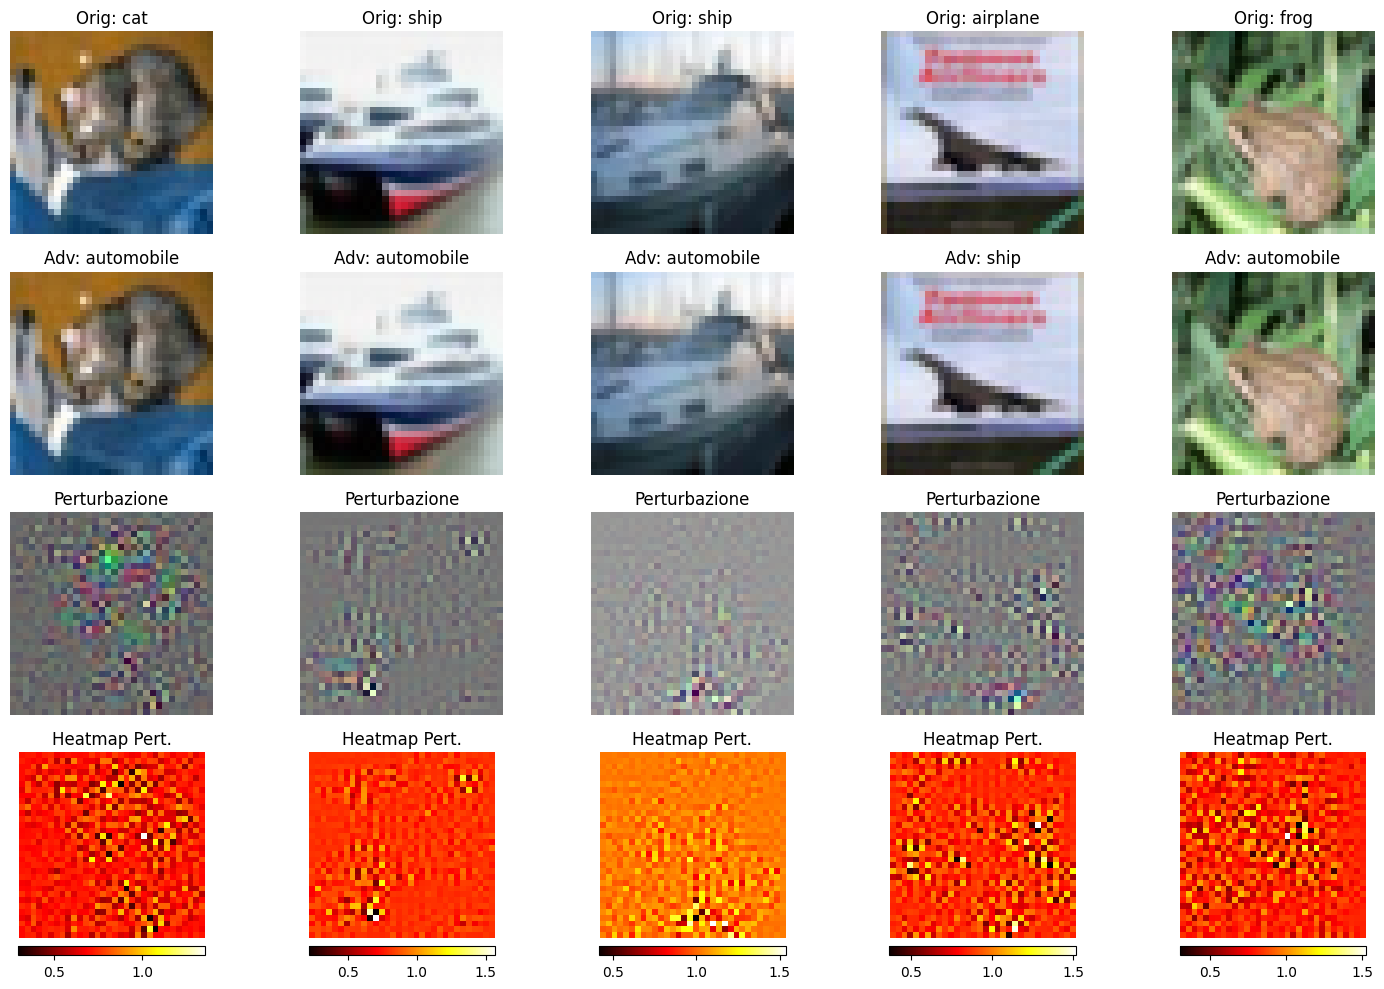

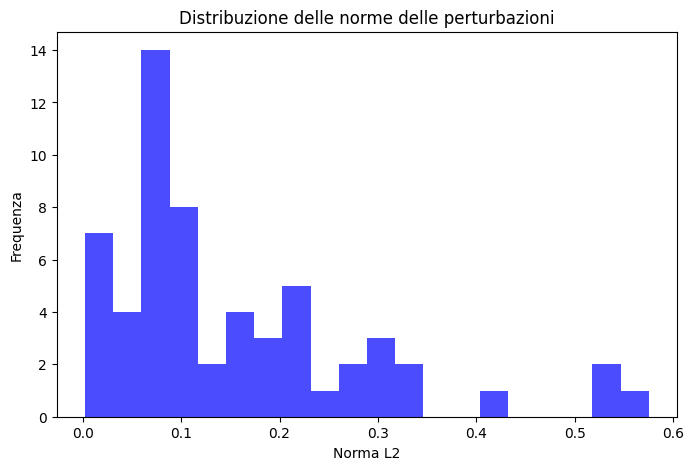


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi riusciti: 0.9919


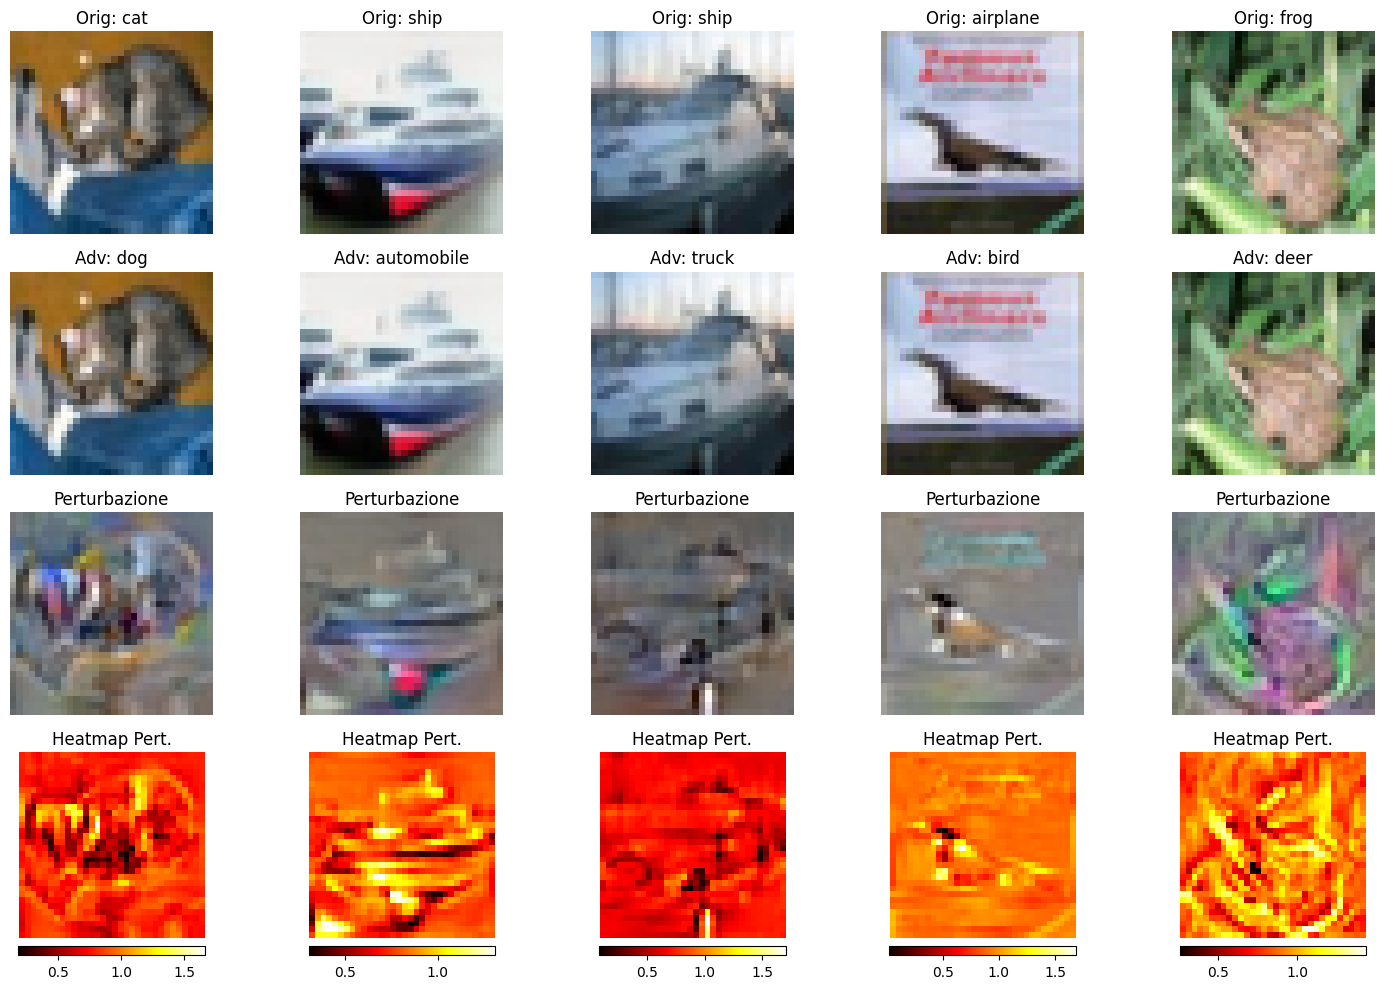

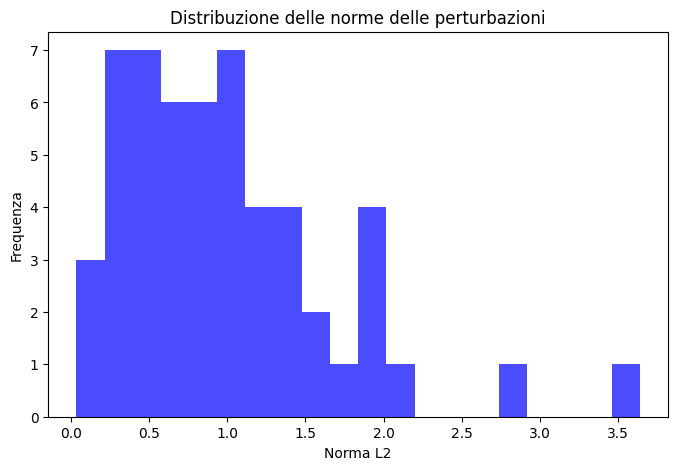


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi riusciti: 1.0291


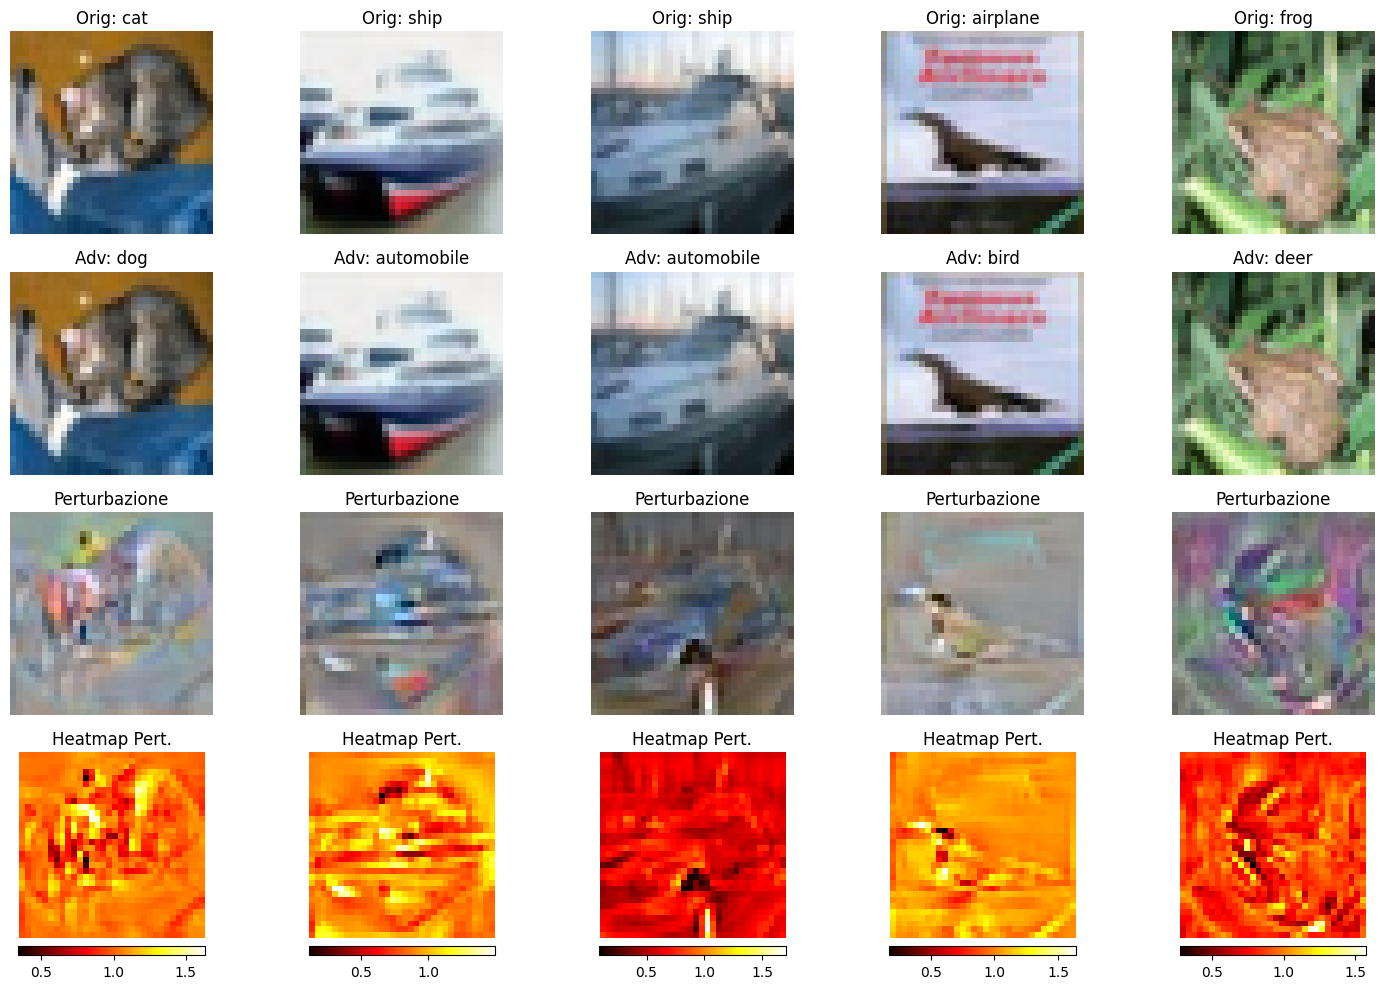

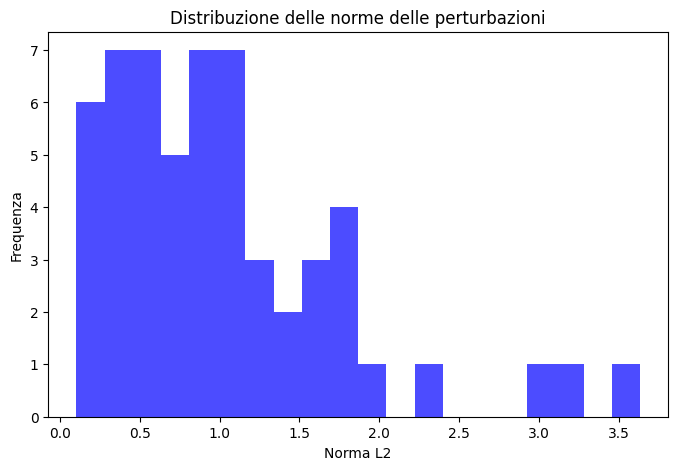


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi riusciti: 0.9786


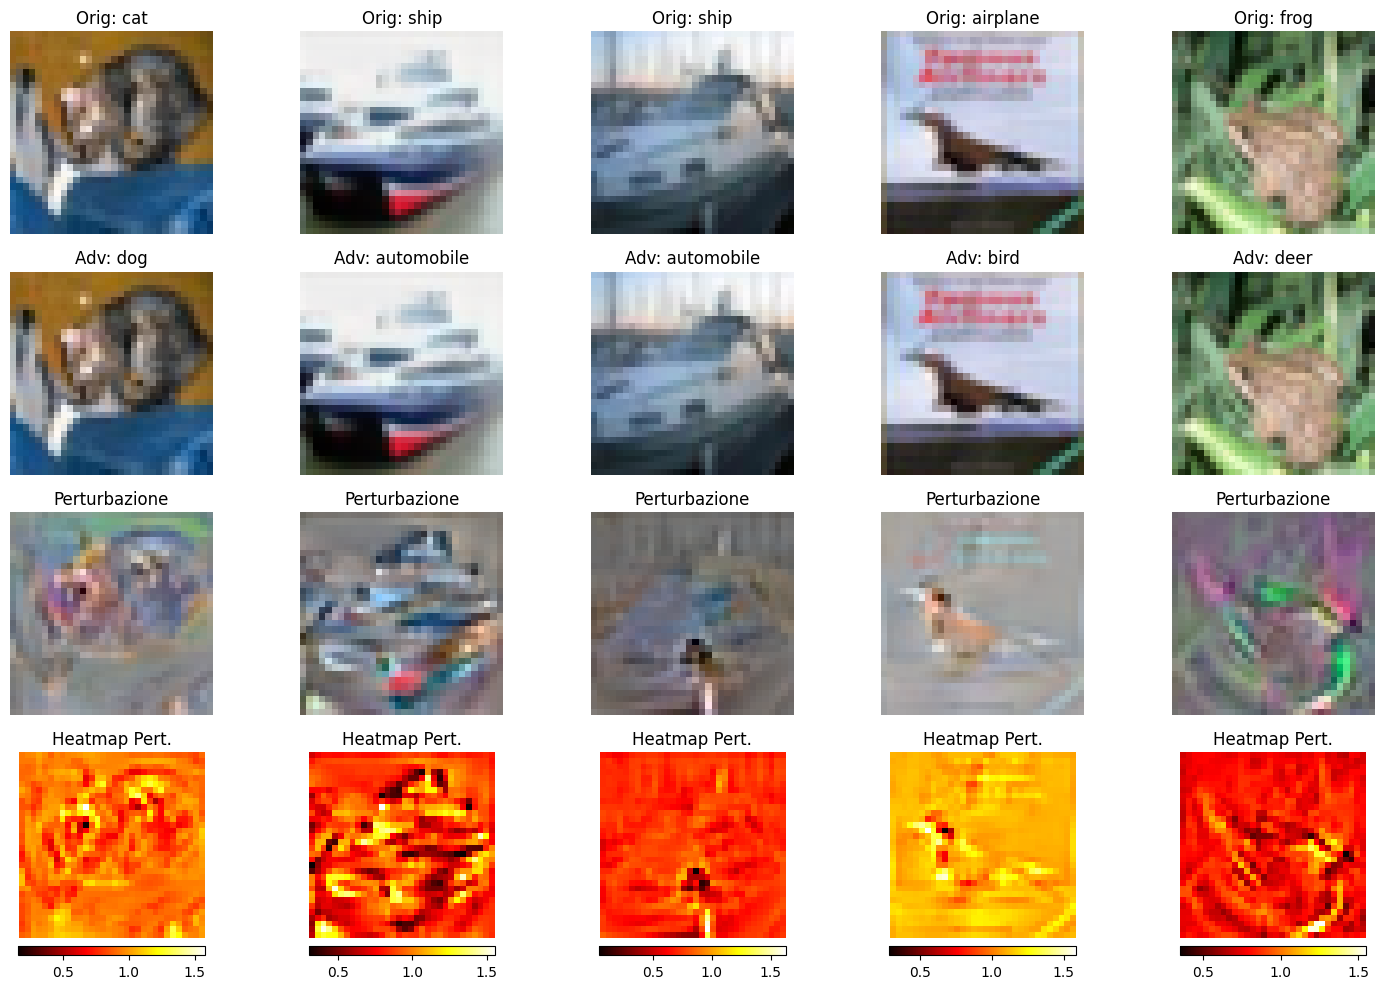

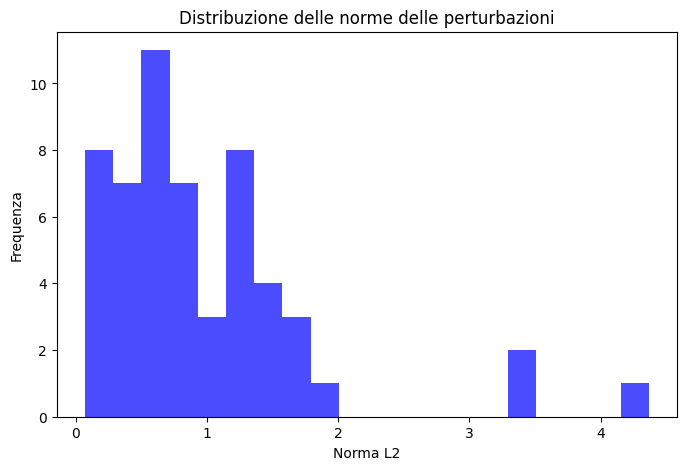


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi riusciti: 1.7415


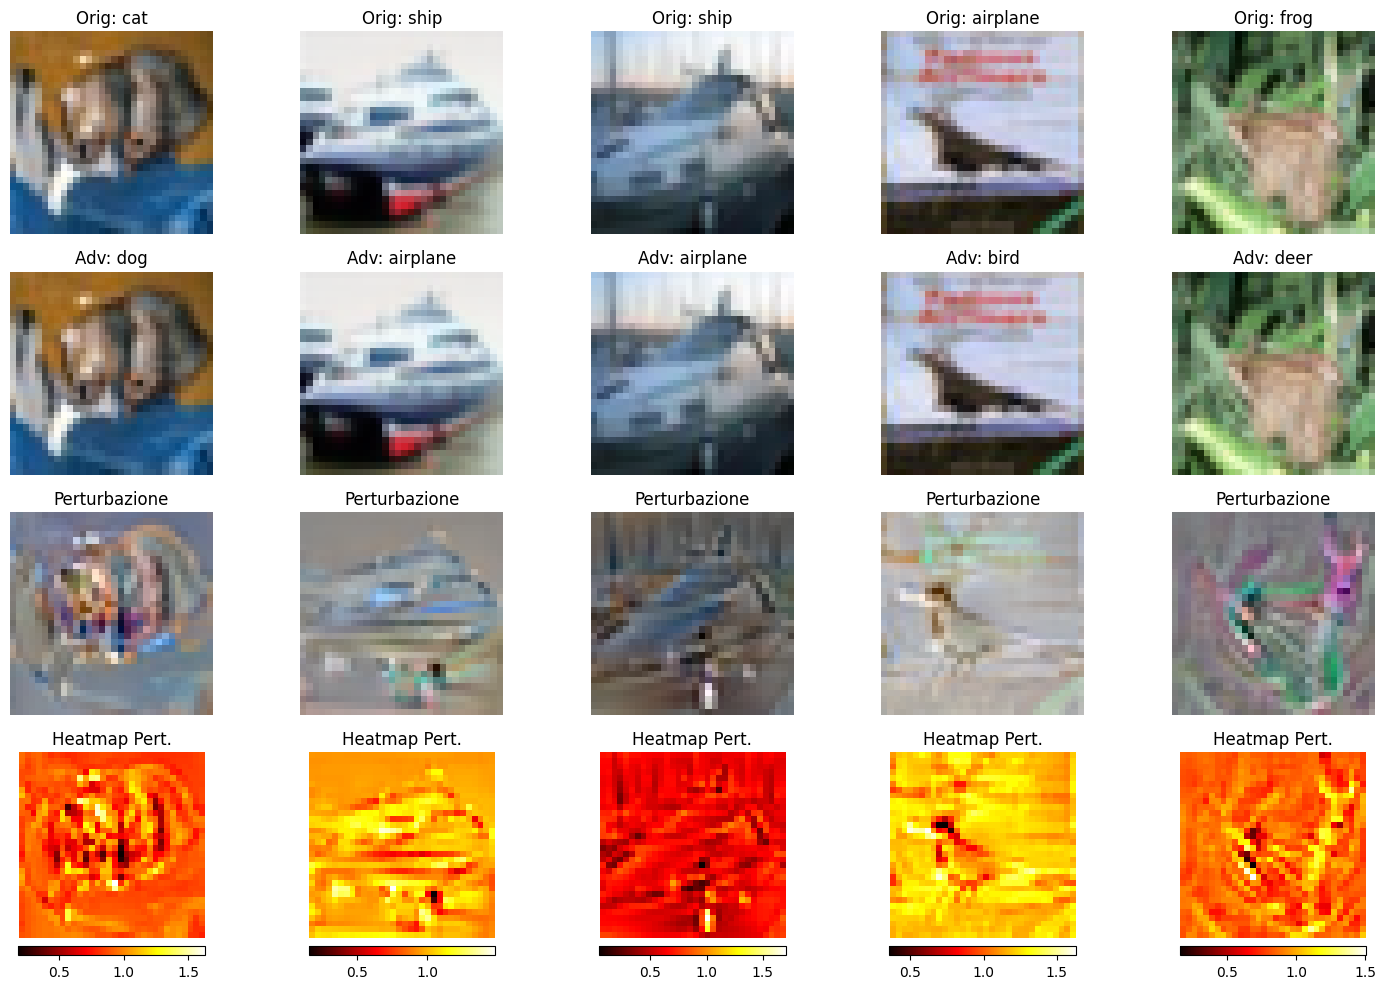

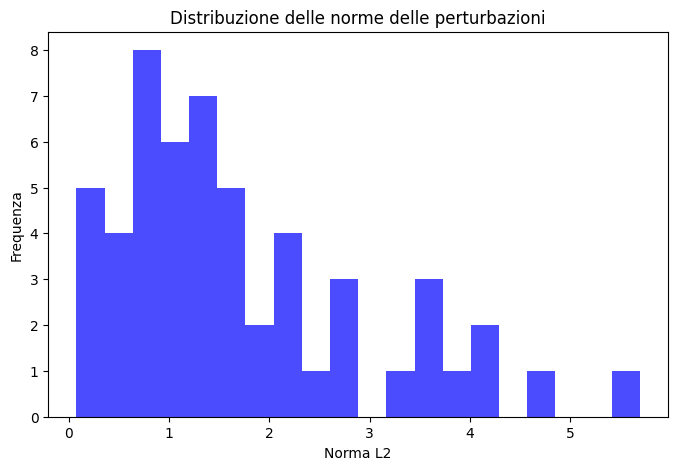

In [ ]:
# Normalizza l'immagine tra 0 e 1 per la visualizzazione
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# Elenco delle etichette del dataset
dataset_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

for result in results_SDF:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]
    failed_attacks = result["failed_attacks"]

    if successful_attacks.nelement() > 0:
        # Immagini originali e avversarie
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        successful_adv_labels = result["adv_predictions"][successful_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        avg_perturbation_magnitude_successful = torch.mean(
            torch.norm(successful_perturbations.view(successful_perturbations.size(0), -1), dim=1)
        ).item()
        print(f"Magnitude media perturbazioni attacchi riusciti: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, successful_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        fig, axes = plt.subplots(4, num_images, figsize=(15, 10))

        for i in range(num_images):
            # Etichette come stringhe
            orig_label = dataset_labels[result["true_labels"][successful_attacks][i].item()]
            adv_label = dataset_labels[successful_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(successful_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label}")
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(successful_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label}")
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(successful_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione")
            axes[2, i].axis("off")

            # Heatmap per l'interpretabilità (L2 norm pixel-wise)
            heatmap = np.linalg.norm(perturbation, axis=0) if perturbation.ndim == 3 else np.abs(perturbation)
            im = axes[3, i].imshow(heatmap, cmap="hot")
            axes[3, i].set_title("Heatmap Pert.")
            axes[3, i].axis("off")
            fig.colorbar(im, ax=axes[3, i], orientation="horizontal", fraction=0.046, pad=0.04)

        plt.tight_layout()
        plt.show()

        # Analisi delle distribuzioni delle perturbazioni
        perturbation_norms = torch.norm(successful_perturbations.view(successful_perturbations.size(0), -1), dim=1).cpu().numpy()
        plt.figure(figsize=(8, 5))
        plt.hist(perturbation_norms, bins=20, color='blue', alpha=0.7)
        plt.title("Distribuzione delle norme delle perturbazioni")
        plt.xlabel("Norma L2")
        plt.ylabel("Frequenza")
        plt.show()

    else:
        print("Nessun attacco riuscito trovato per il modello.")



Analisi per il modello: Standard
Magnitude media perturbazioni attacchi riusciti: 0.1560


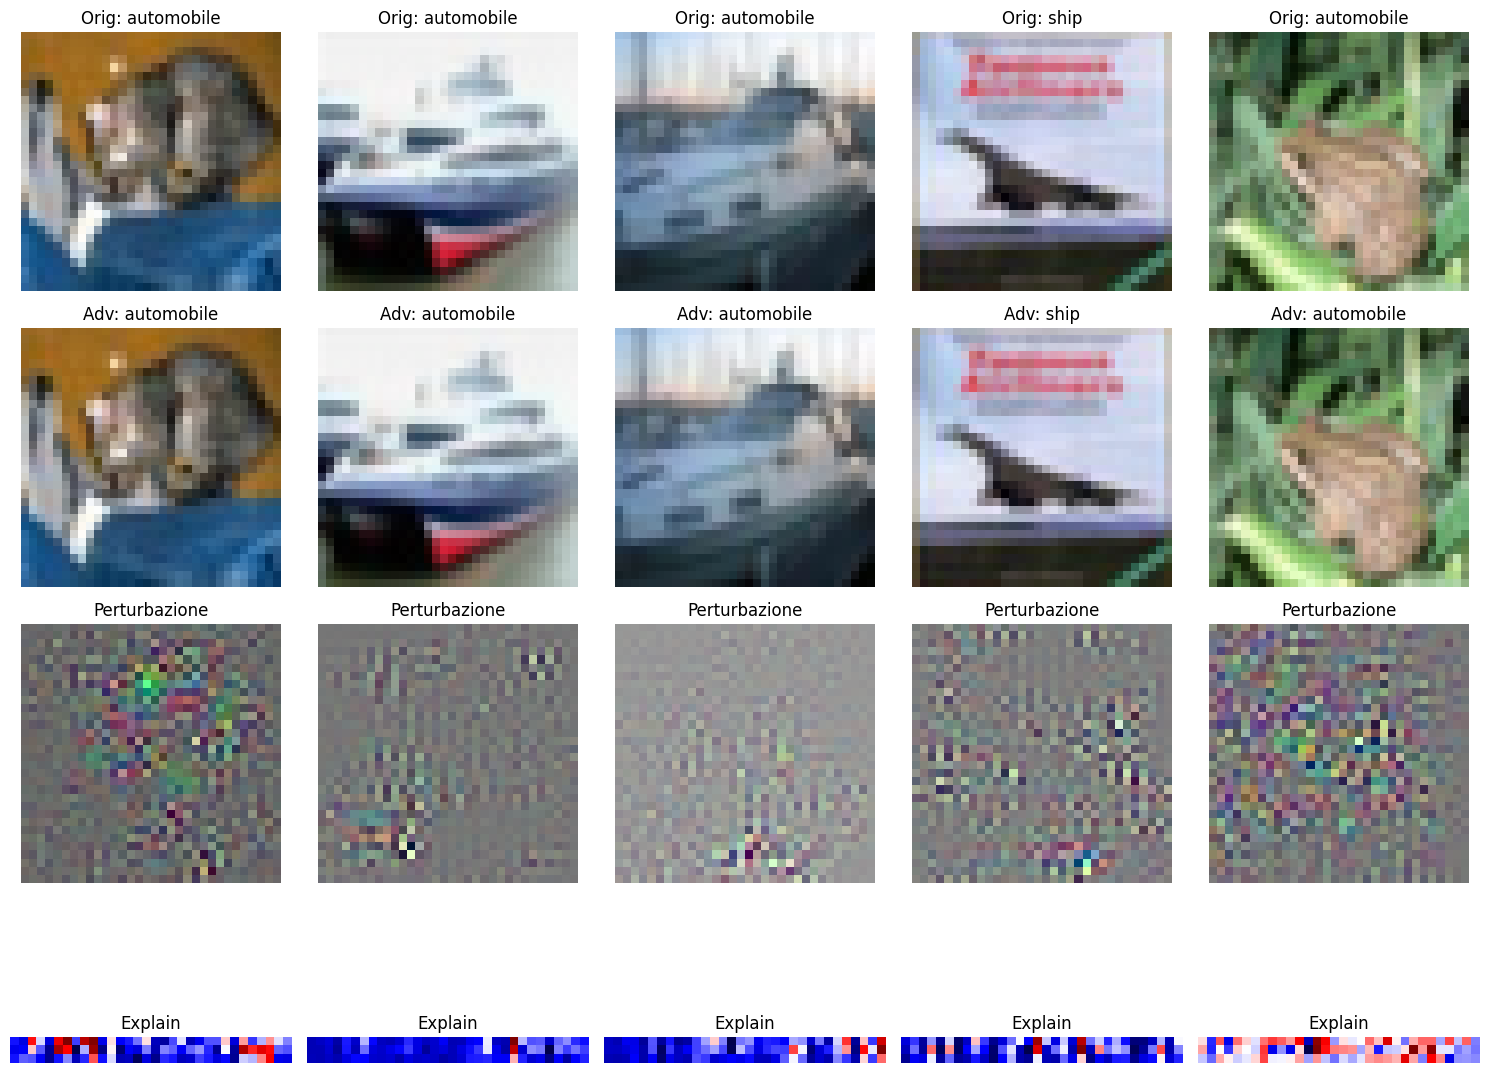


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi riusciti: 0.9919


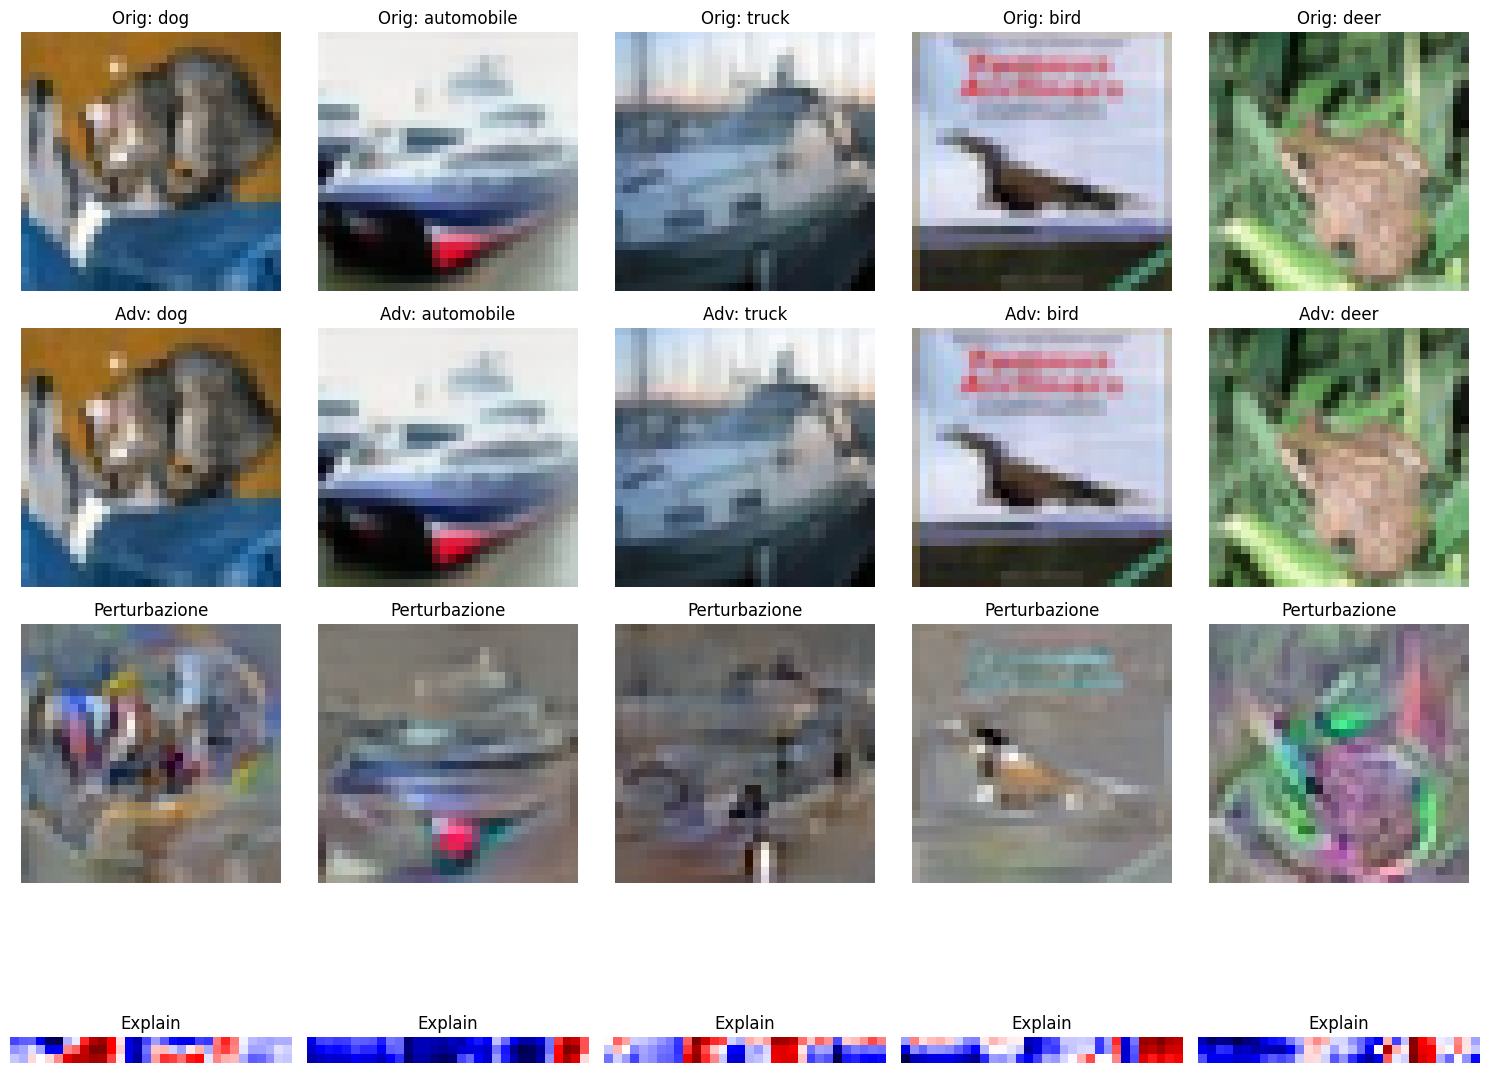


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi riusciti: 1.0291


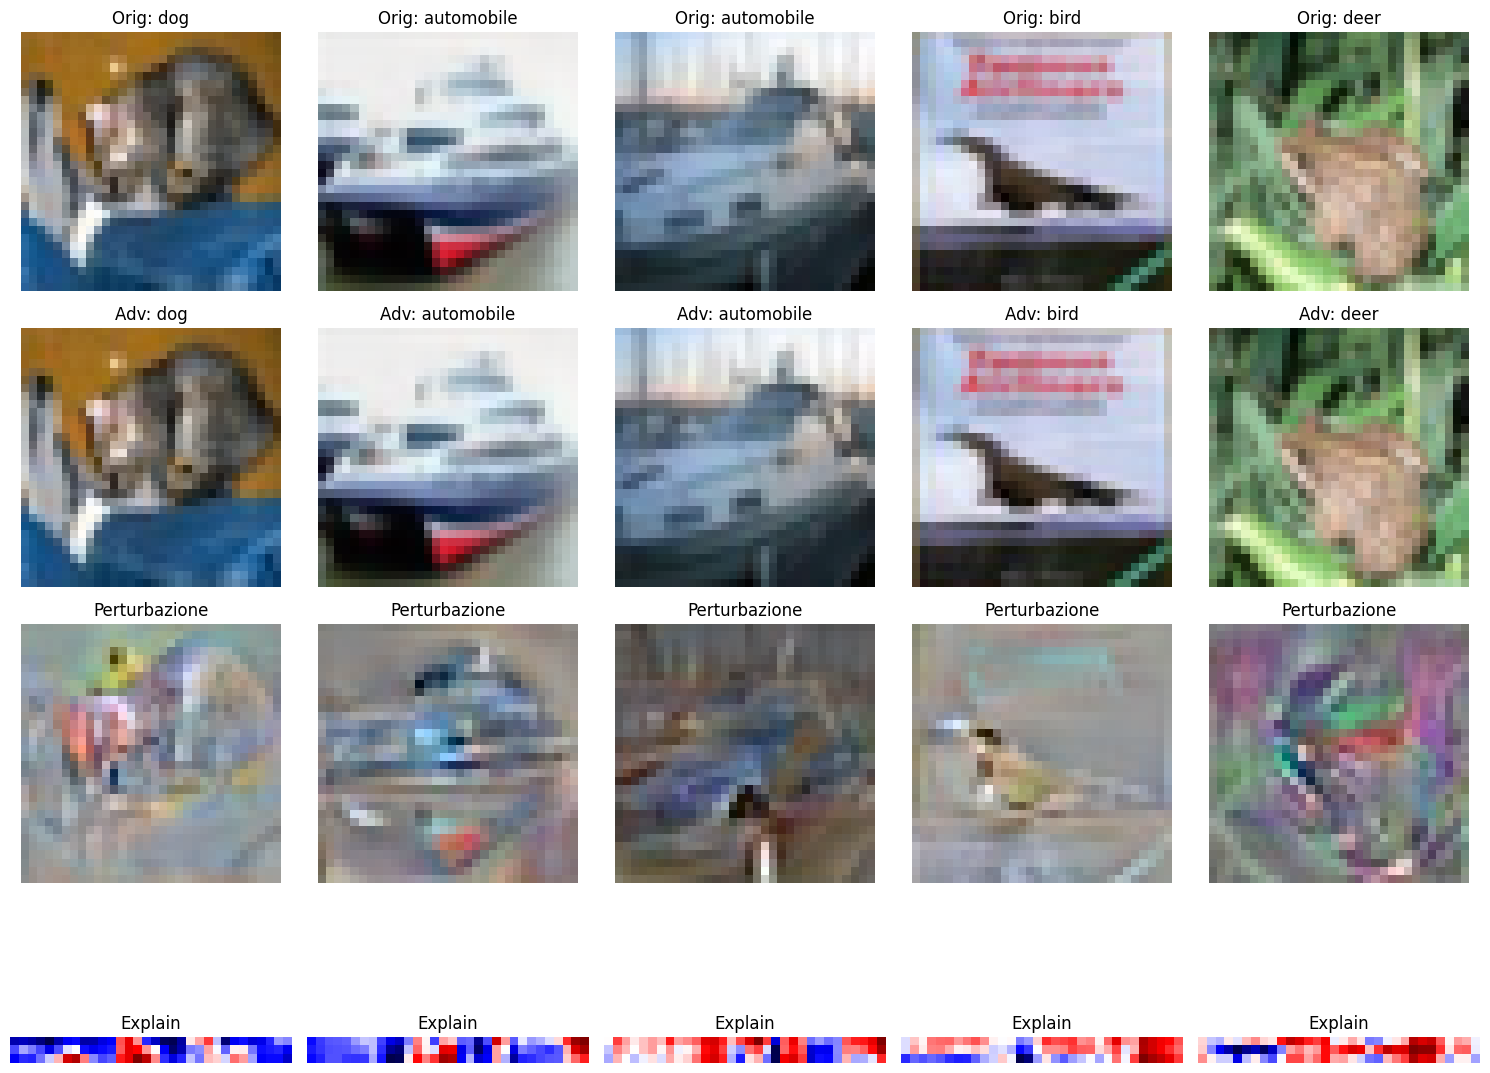


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi riusciti: 0.9786


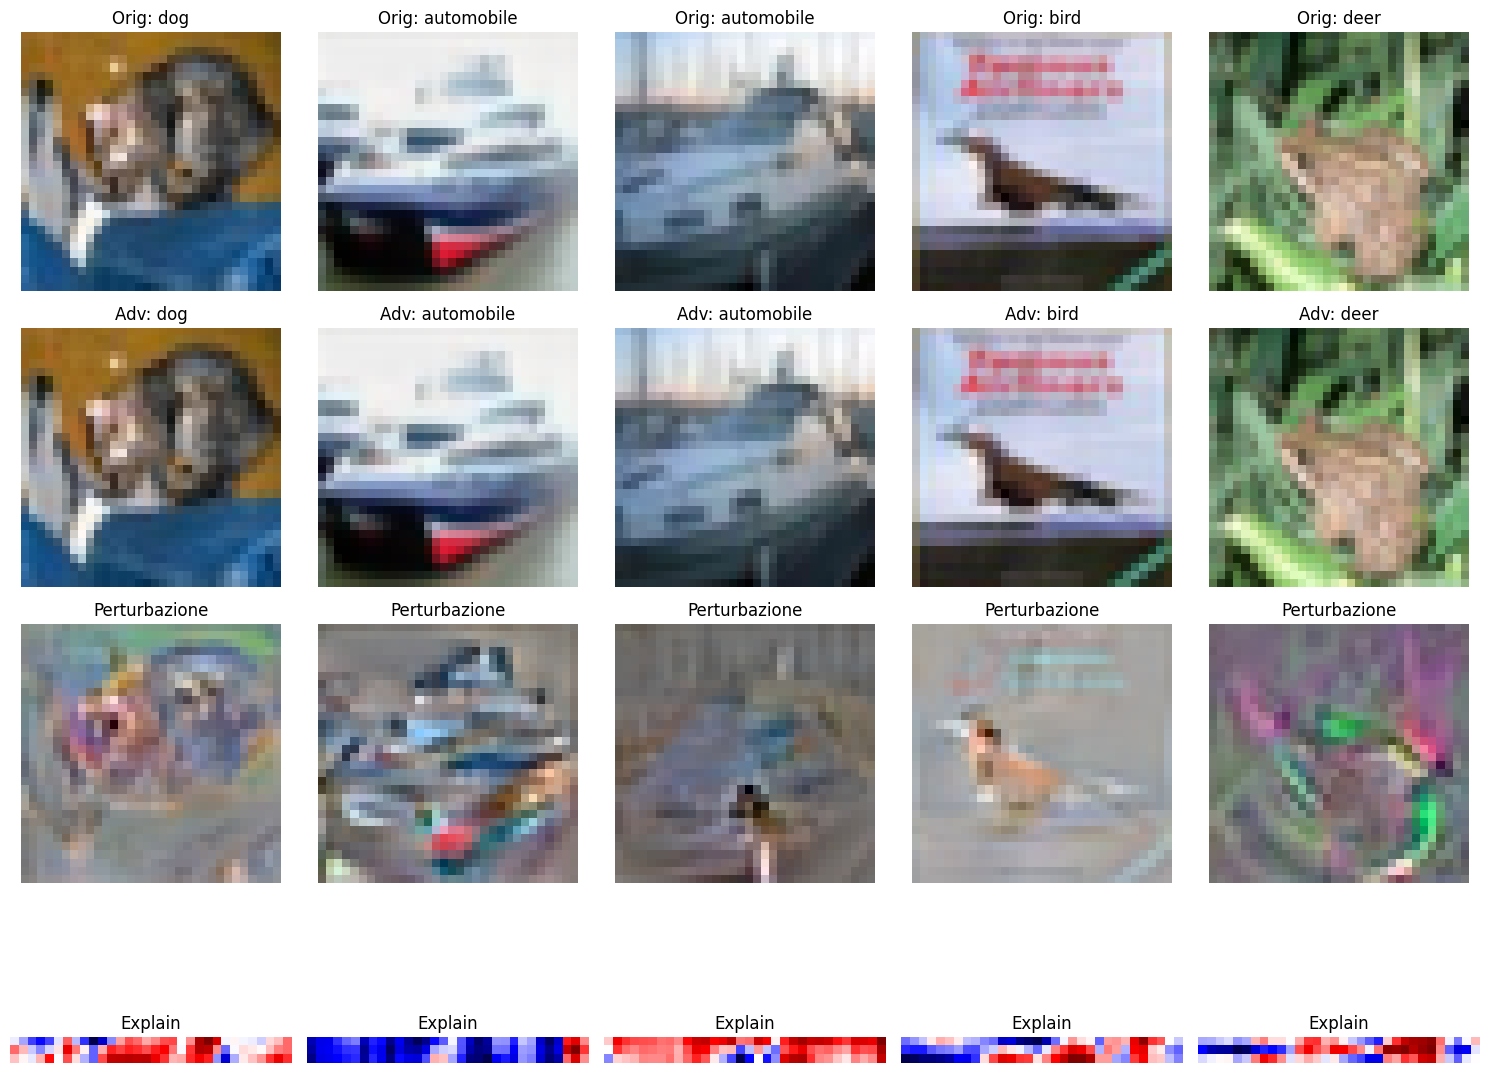


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi riusciti: 1.7415


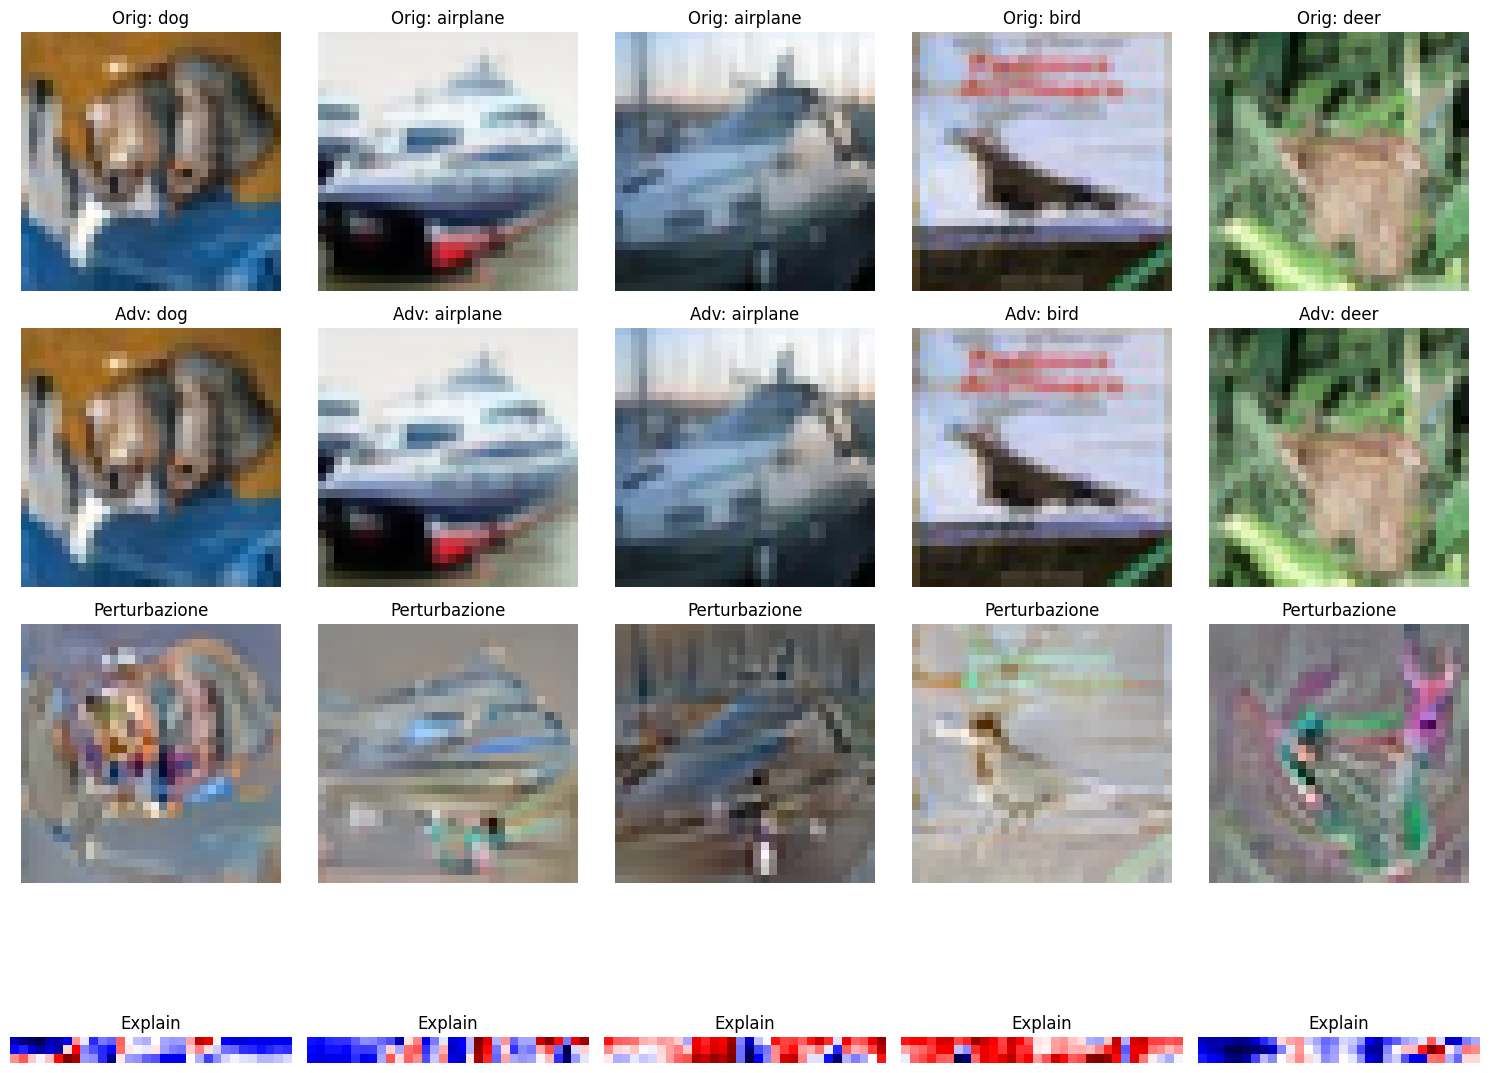

In [ ]:
# Funzione per calcolare la spiegazione: massimo errore per pixel
def calculate_explainability(perturbation):
    """
    Calcola la massima componente assoluta per pixel da una perturbazione.
    Funziona sia per immagini RGB che in scala di grigi.
    """
    # Se il dato è un tensore PyTorch, converti in NumPy
    if isinstance(perturbation, torch.Tensor):
        perturbation = perturbation.cpu().numpy()

    # Calcolo del massimo errore per pixel
    if perturbation.ndim == 3:  # Per immagini RGB
        r = np.abs(perturbation[:, :, 0])
        g = np.abs(perturbation[:, :, 1])
        b = np.abs(perturbation[:, :, 2])
        expl = np.maximum(np.maximum(r, g), b)
    else:  # Per immagini in scala di grigi
        expl = np.abs(perturbation)

    return expl

for result in results_SDF:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]
    failed_attacks = result["failed_attacks"]

    if successful_attacks.nelement() > 0:
        # Immagini originali e avversarie
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        successful_adv_labels = result["adv_predictions"][successful_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        avg_perturbation_magnitude_successful = torch.mean(torch.norm(successful_perturbations.view(successful_perturbations.size(0), -1), dim=1)).item()
        print(f"Magnitude media perturbazioni attacchi riusciti: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, successful_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        fig, axes = plt.subplots(4, num_images, figsize=(15, 12))  # 4 righe: originale, avversario, perturbazione, spiegazione

        for i in range(num_images):
            # Etichette come stringhe
            orig_label = dataset_labels[successful_adv_labels[i].item()]
            adv_label = dataset_labels[successful_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(successful_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label}")
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(successful_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label}")
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(successful_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione")
            axes[2, i].axis("off")

            # Spiegazione (massimo errore per pixel)
            expl = calculate_explainability(perturbation)
            axes[3, i].imshow(expl, cmap='seismic')
            axes[3, i].set_title("Explain")
            axes[3, i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")



Analisi per il modello: Standard
Magnitude media perturbazioni attacchi riusciti: 0.1560


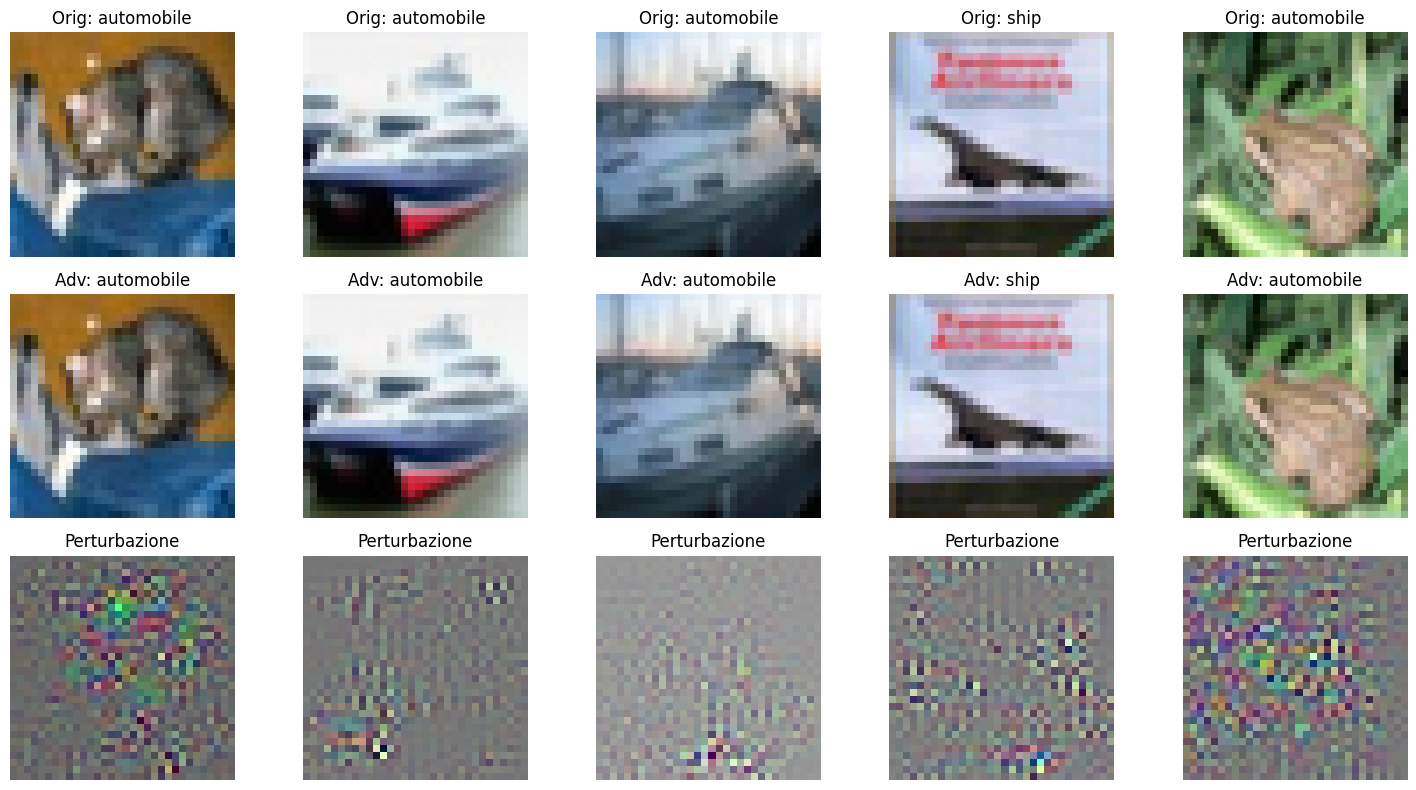


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi riusciti: 0.9919


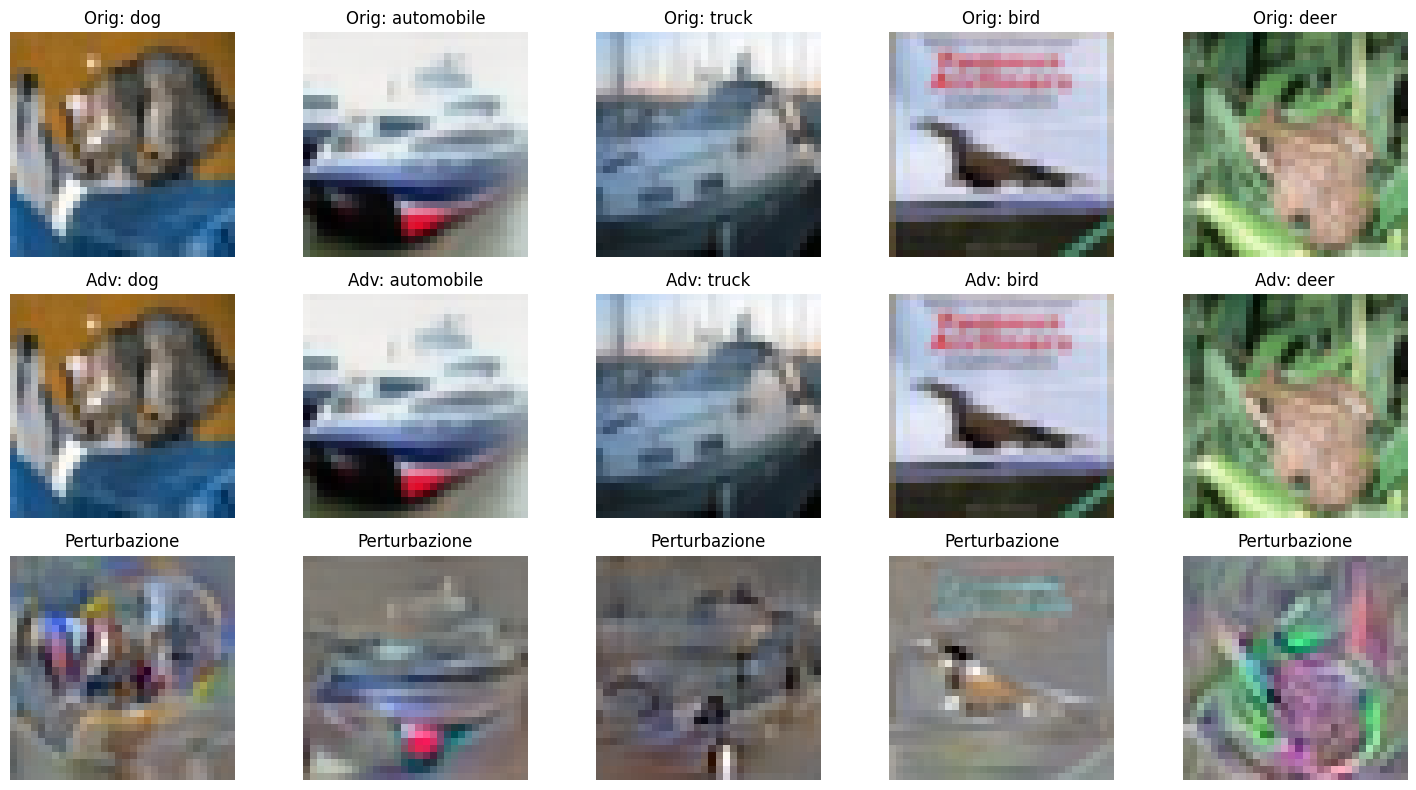


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi riusciti: 1.0291


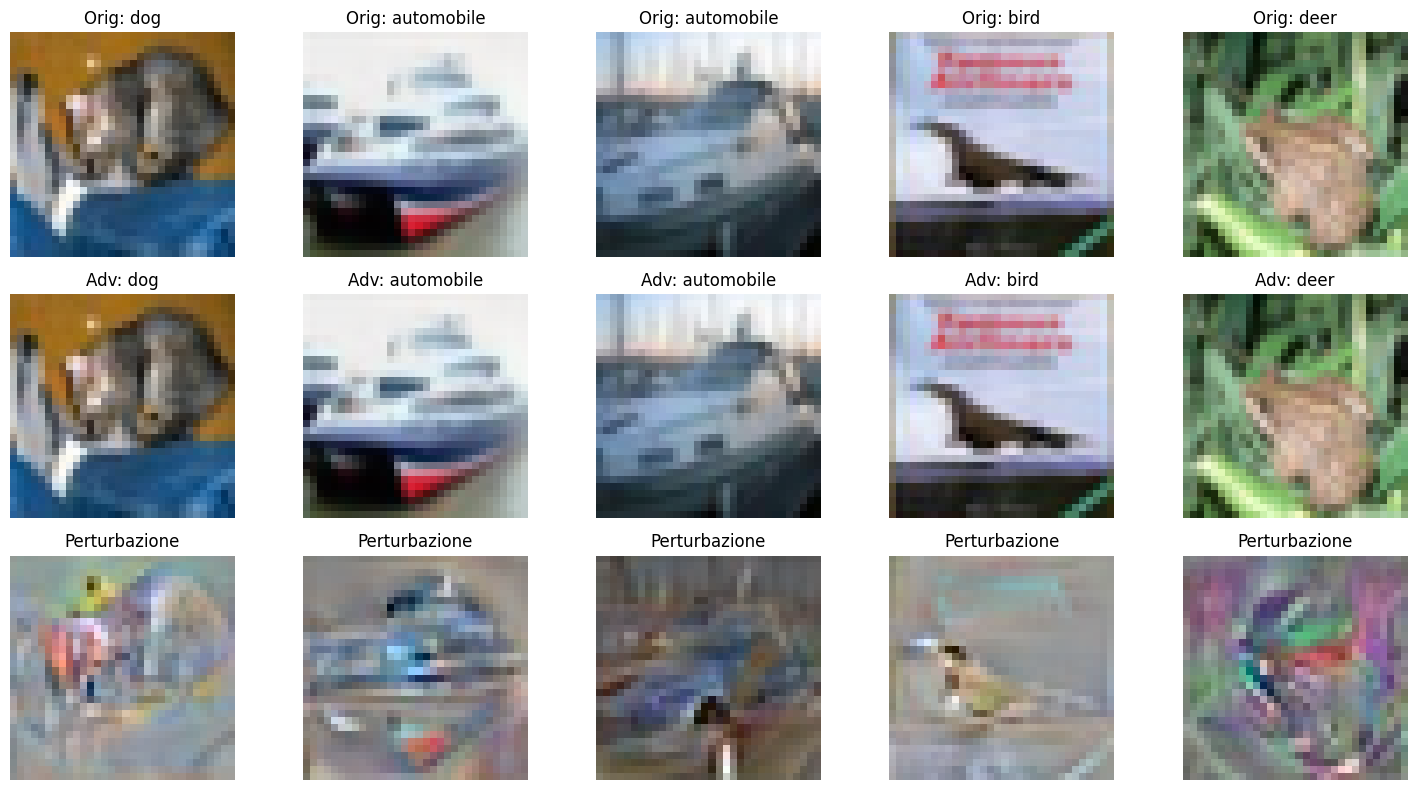


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi riusciti: 0.9786


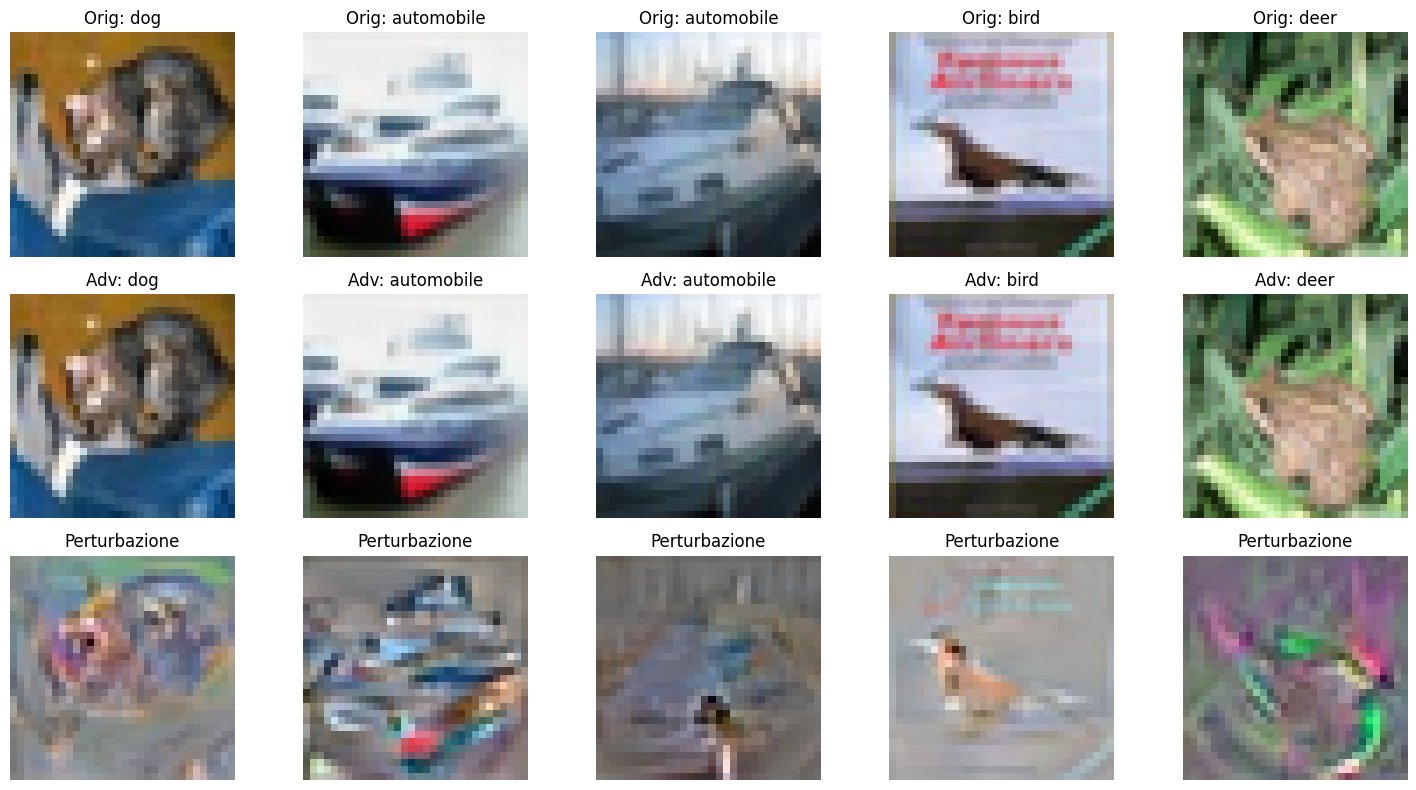


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi riusciti: 1.7415


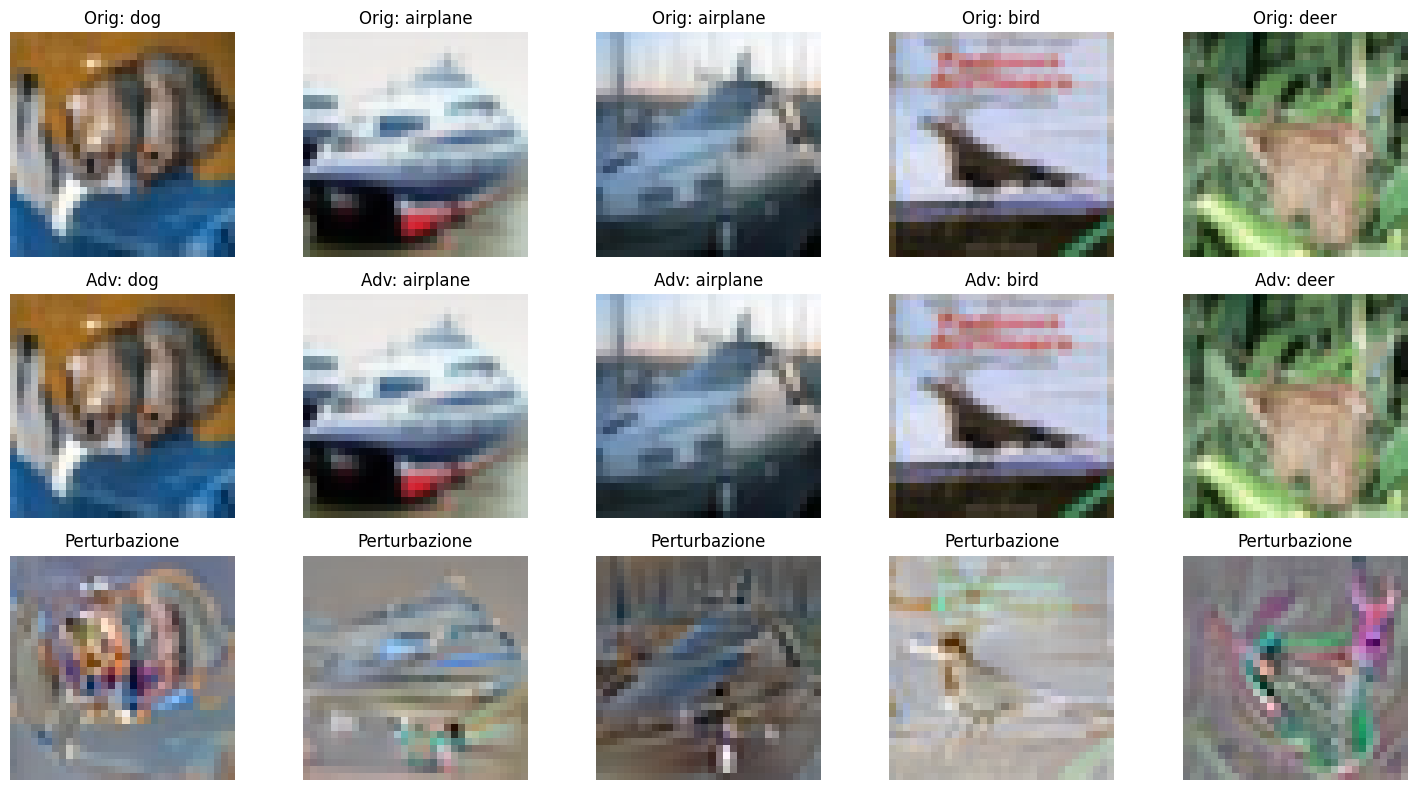

In [ ]:
import matplotlib.pyplot as plt


# Normalizza l'immagine tra 0 e 1 per la visualizzazione
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# Elenco delle etichette del dataset
dataset_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

for result in results_SDF:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]
    failed_attacks = result["failed_attacks"]

    if successful_attacks.nelement() > 0:
        # Immagini originali e avversarie
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        successful_adv_labels = result["adv_predictions"][successful_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        avg_perturbation_magnitude_successful = torch.mean(torch.norm(successful_perturbations.view(successful_perturbations.size(0), -1), dim=1)).item()
        print(f"Magnitude media perturbazioni attacchi riusciti: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, successful_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        fig, axes = plt.subplots(3, num_images, figsize=(15, 8))

        for i in range(num_images):
            # Etichette come stringhe
            orig_label = dataset_labels[successful_adv_labels[i].item()]
            adv_label = dataset_labels[successful_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(successful_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label}")
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(successful_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label}")
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(successful_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione")
            axes[2, i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")



Analisi per il modello: Standard
Magnitude media perturbazioni attacchi efficaci: 0.1560


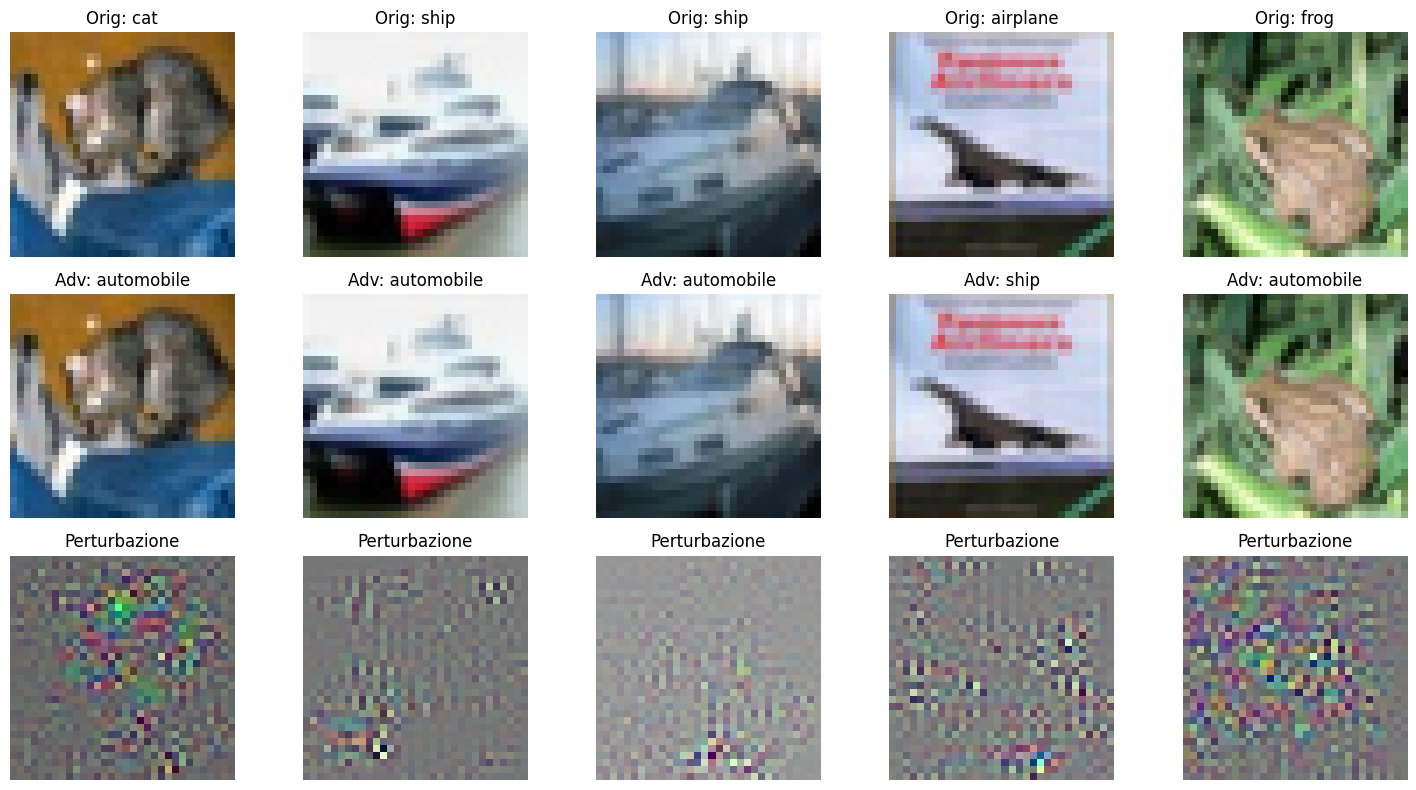


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi efficaci: 0.9919


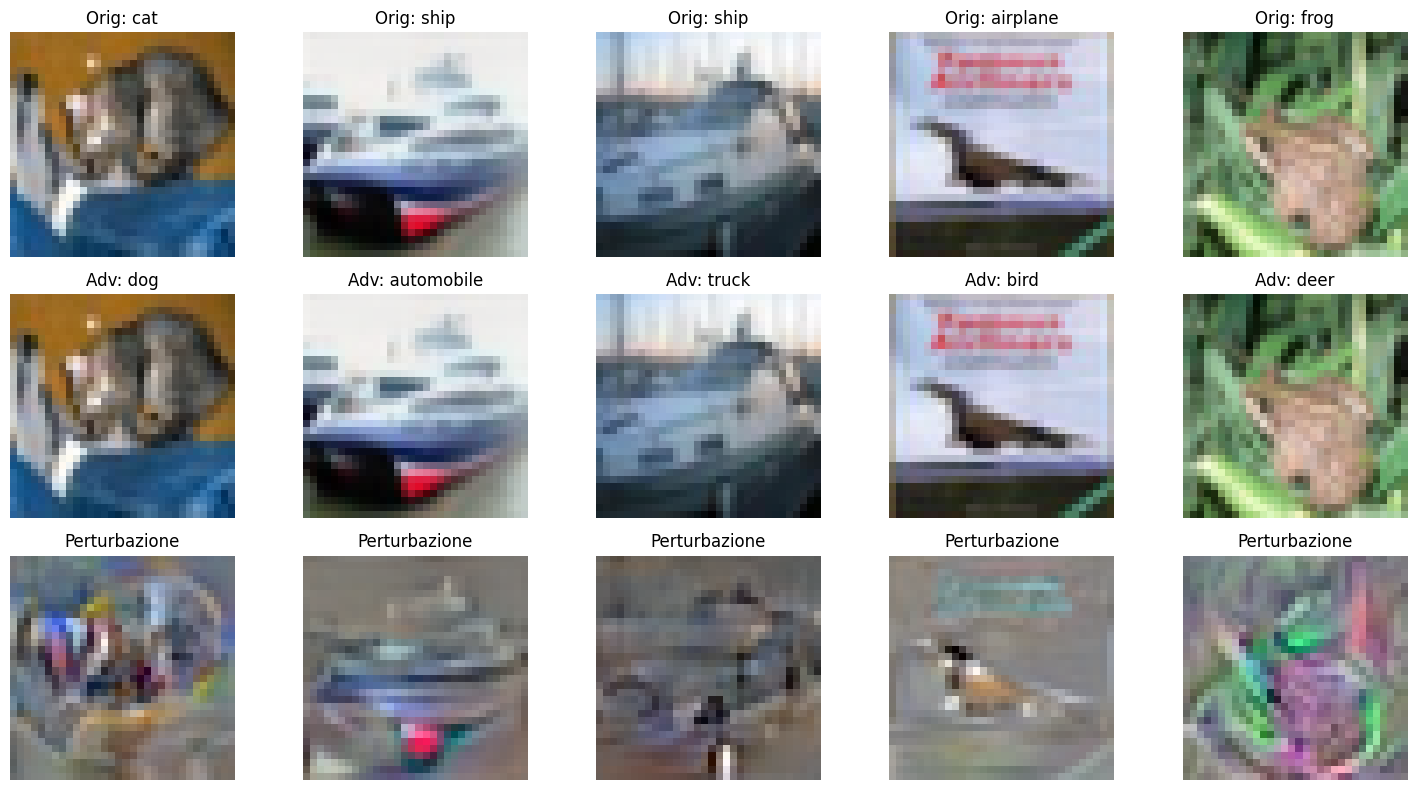


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi efficaci: 1.0291


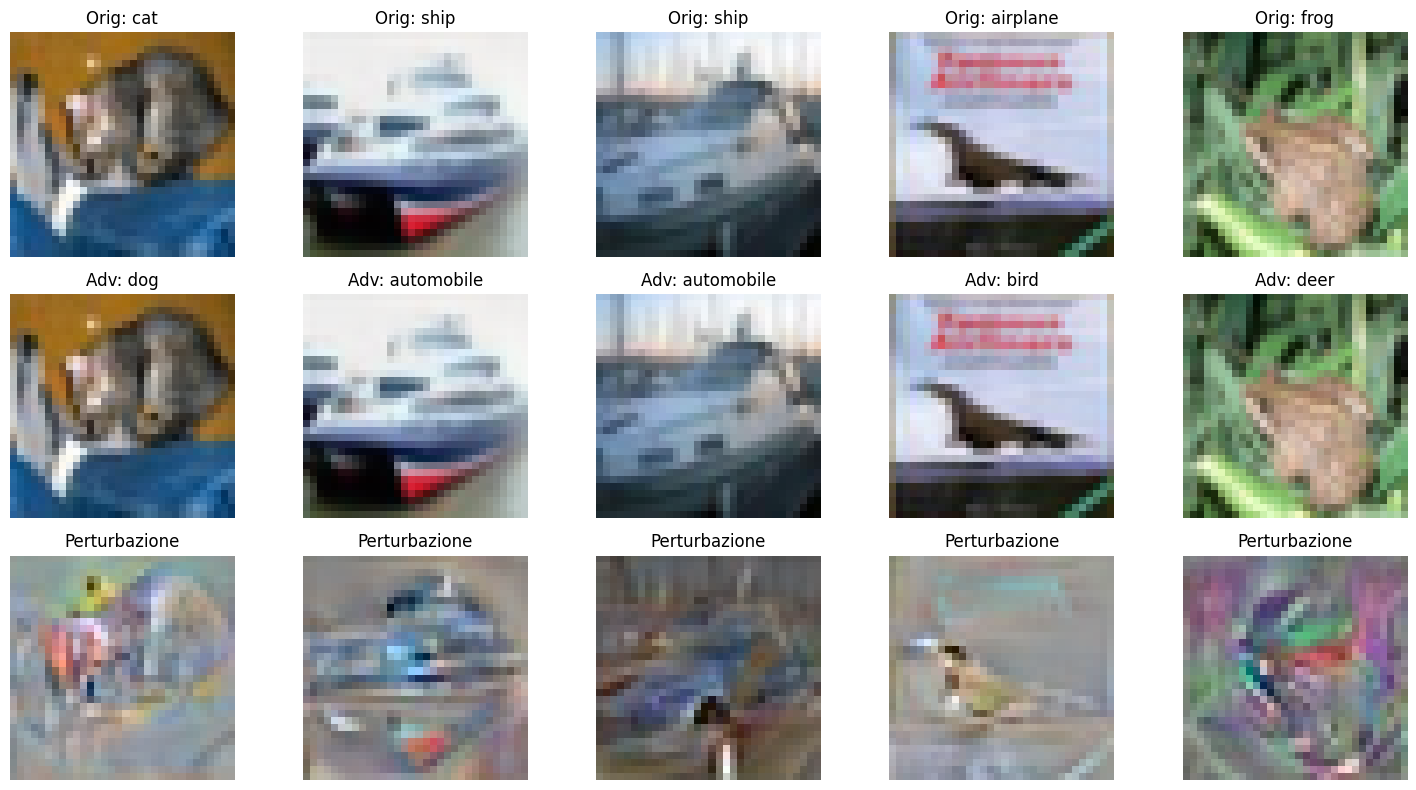


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi efficaci: 0.9786


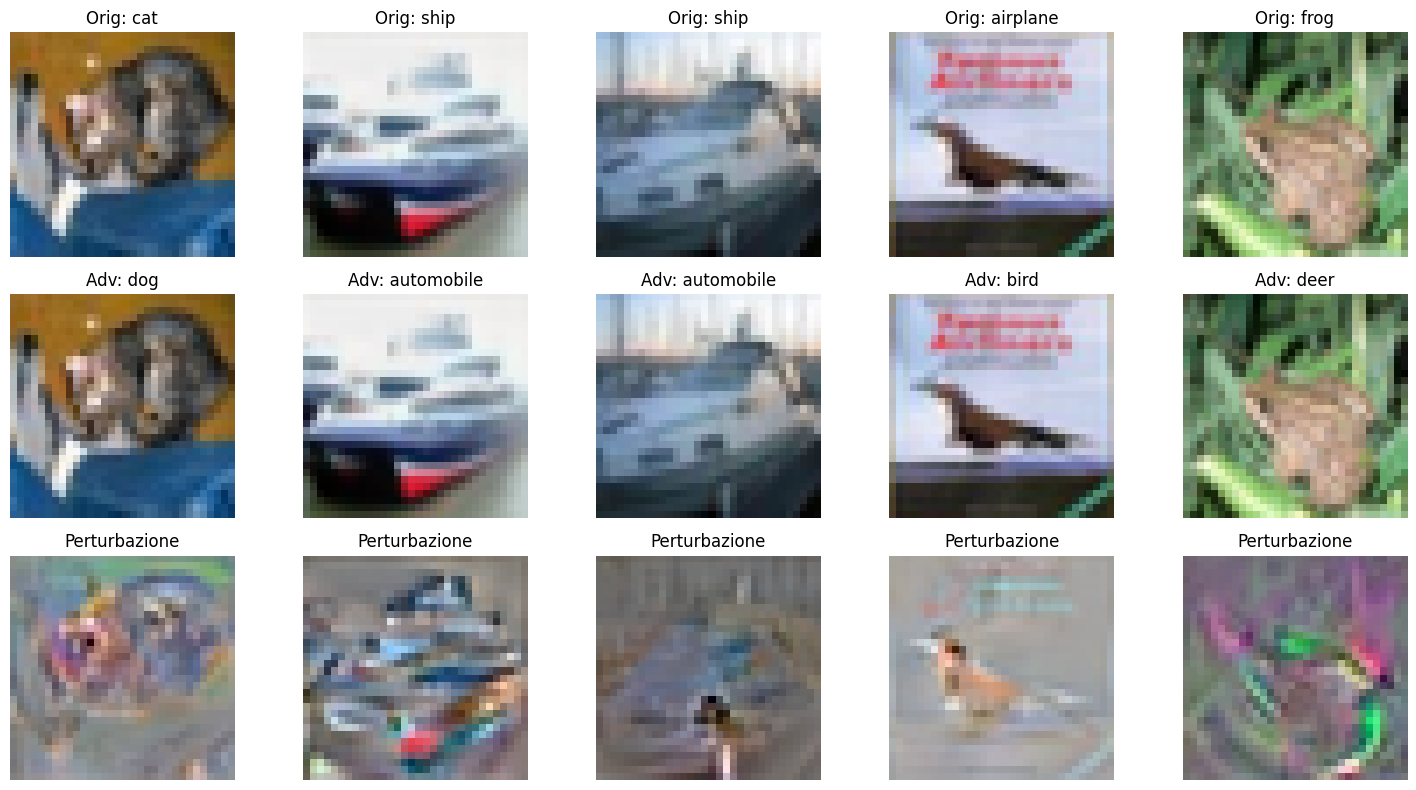


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi efficaci: 1.7415


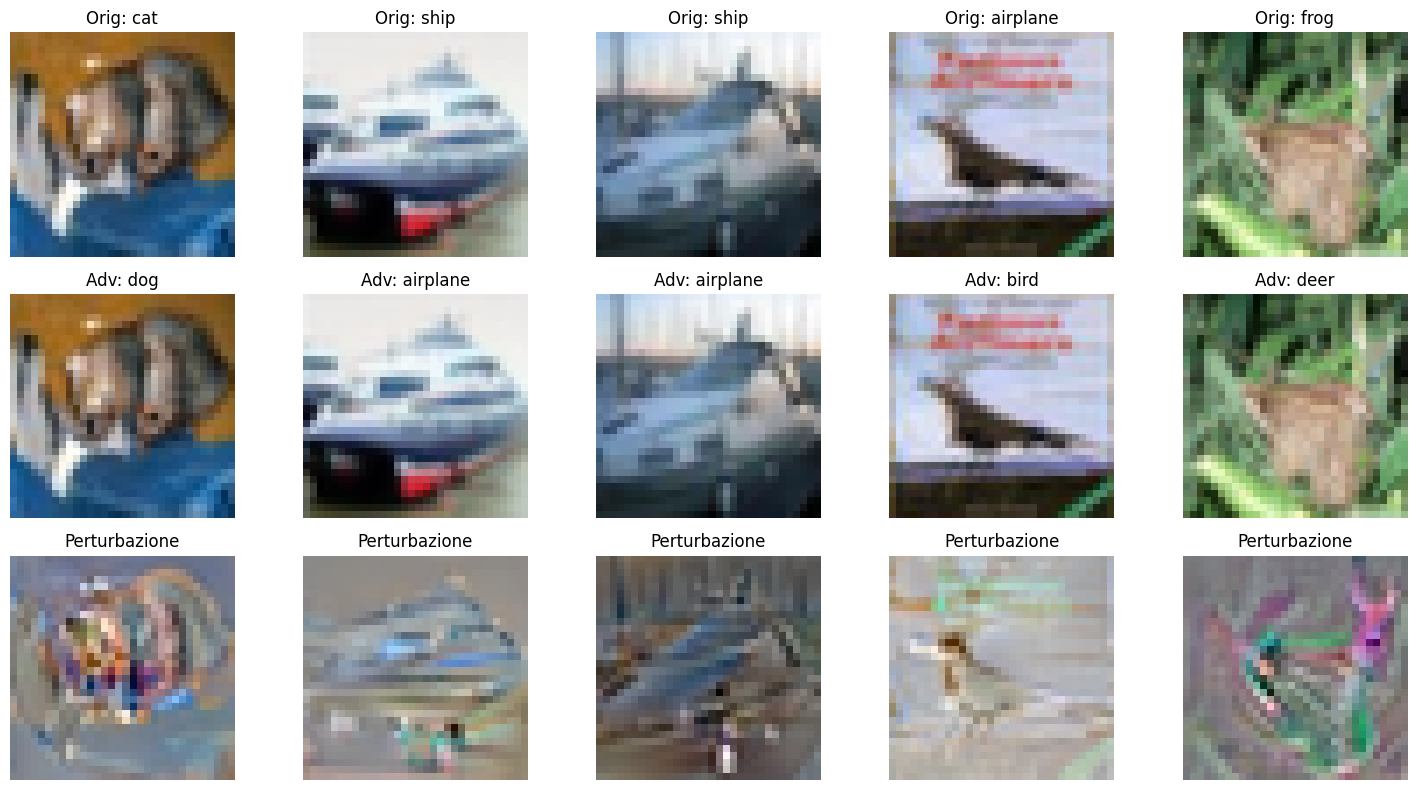

In [ ]:
# Normalizza l'immagine tra 0 e 1 per la visualizzazione
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# Elenco delle etichette del dataset
dataset_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

for result in results_SDF:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]

    if successful_attacks.nelement() > 0:
        # Estrai le immagini e le predizioni per gli attacchi riusciti
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        orig_labels = result["true_labels"][successful_attacks]
        adv_labels = result["adv_predictions"][successful_attacks]

        # Filtra i campioni in cui l'attacco è stato efficace
        effective_attacks = orig_labels != adv_labels
        if effective_attacks.sum() == 0:
            print("Nessun attacco efficace trovato per questo modello.")
            continue

        effective_orig_images = successful_orig_images[effective_attacks]
        effective_adv_images = successful_adv_images[effective_attacks]
        effective_orig_labels = orig_labels[effective_attacks]
        effective_adv_labels = adv_labels[effective_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        effective_perturbations = successful_perturbations[effective_attacks]
        avg_perturbation_magnitude_successful = torch.mean(torch.norm(effective_perturbations.view(effective_perturbations.size(0), -1), dim=1)).item()
        print(f"Magnitude media perturbazioni attacchi efficaci: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, effective_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        fig, axes = plt.subplots(3, num_images, figsize=(15, 8))

        for i in range(num_images):
            # Etichette come stringhe
            orig_label_str = dataset_labels[effective_orig_labels[i].item()]
            adv_label_str = dataset_labels[effective_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(effective_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label_str}")
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(effective_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label_str}")
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(effective_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione")
            axes[2, i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")



Analisi per il modello: Standard


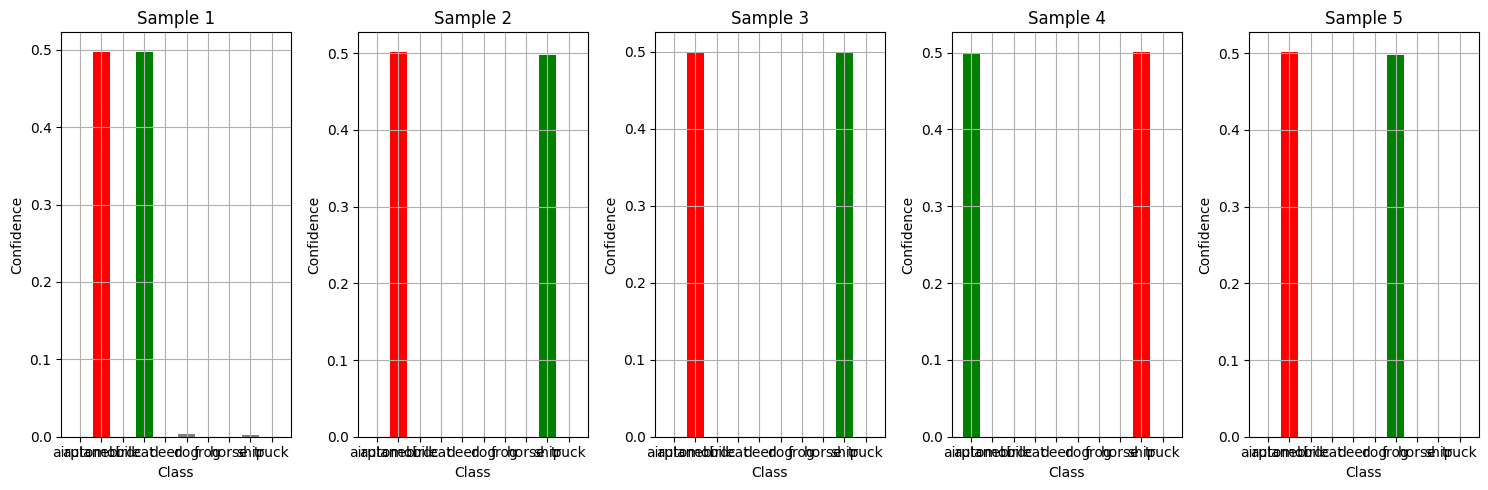


Analisi per il modello: Ding2020MMA


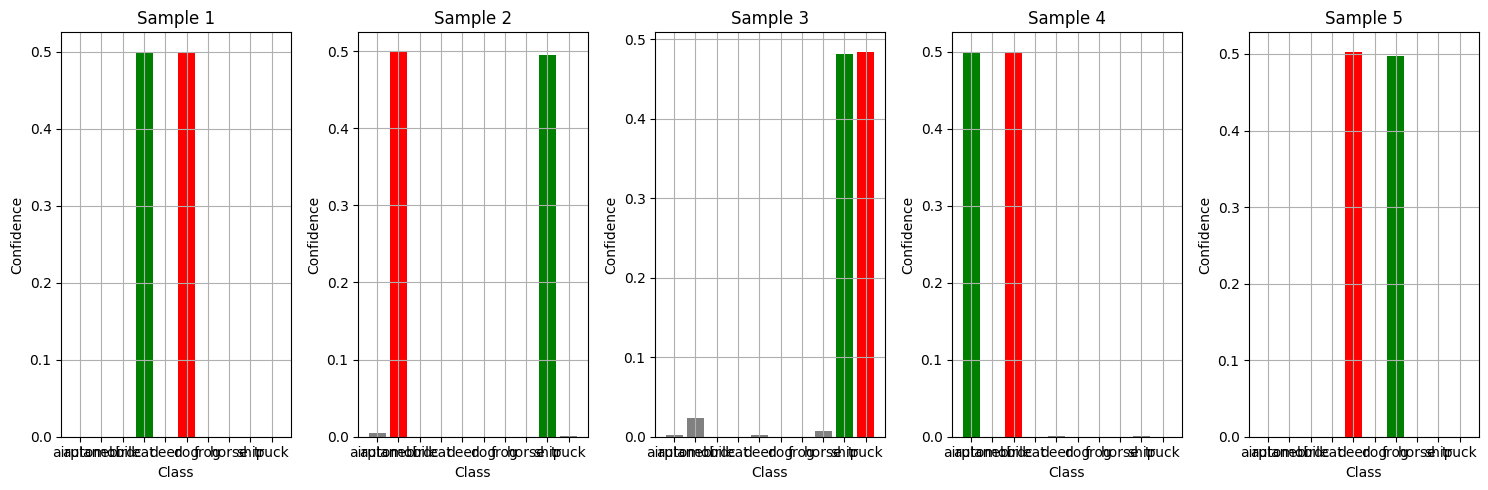


Analisi per il modello: Rony2019Decoupling


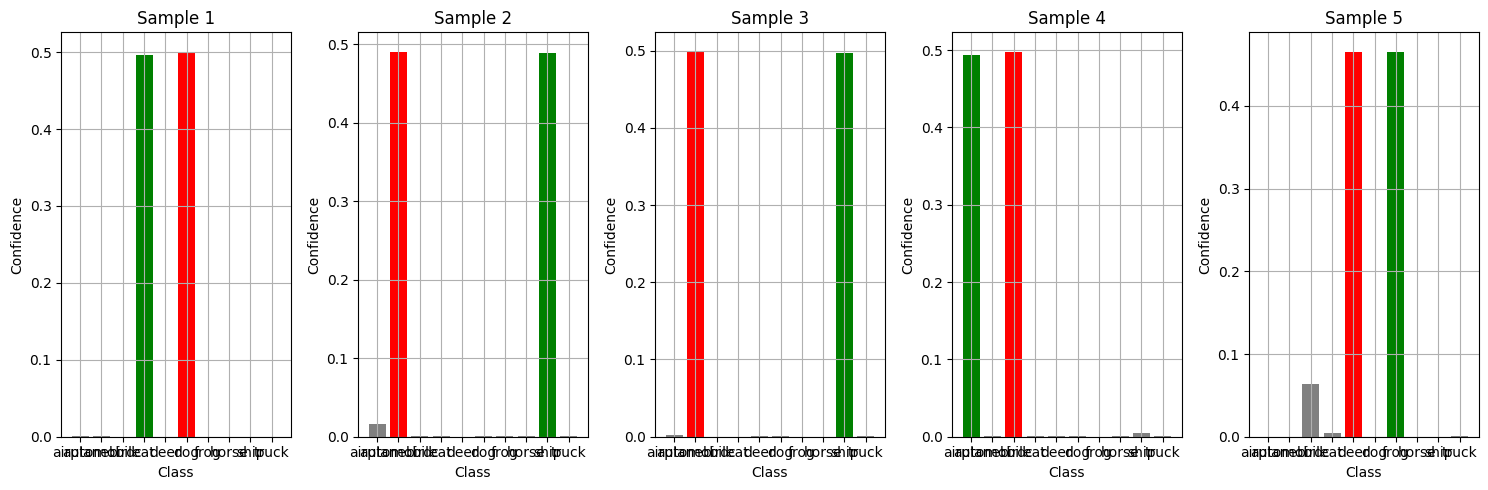


Analisi per il modello: Rice2020Overfitting


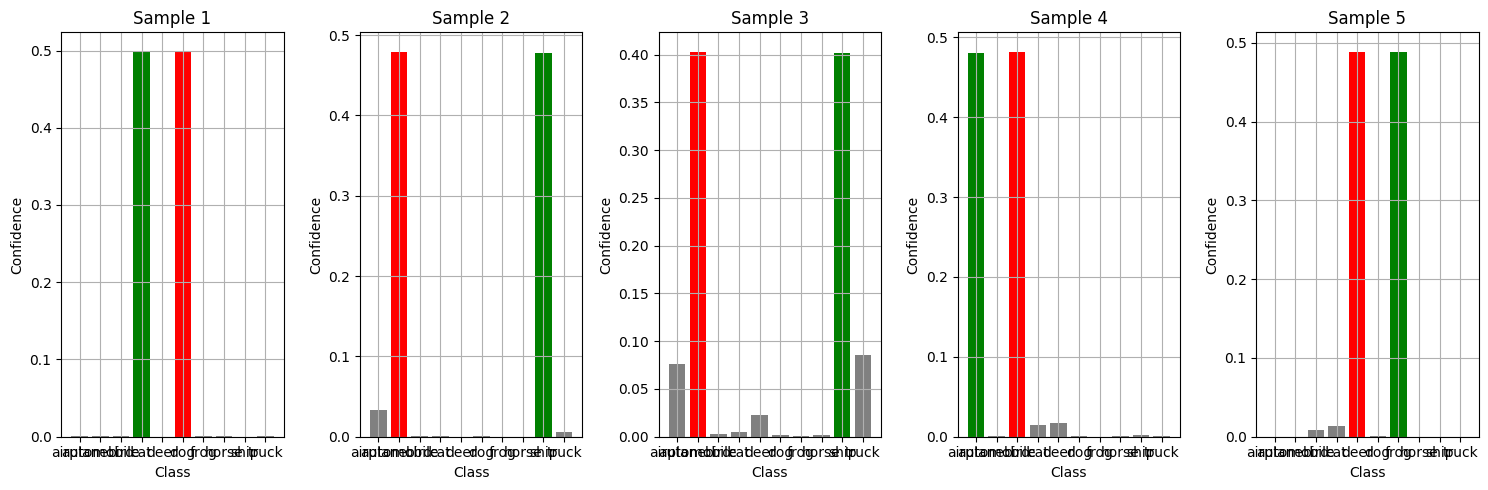


Analisi per il modello: Wang2023Better_WRN-70-16


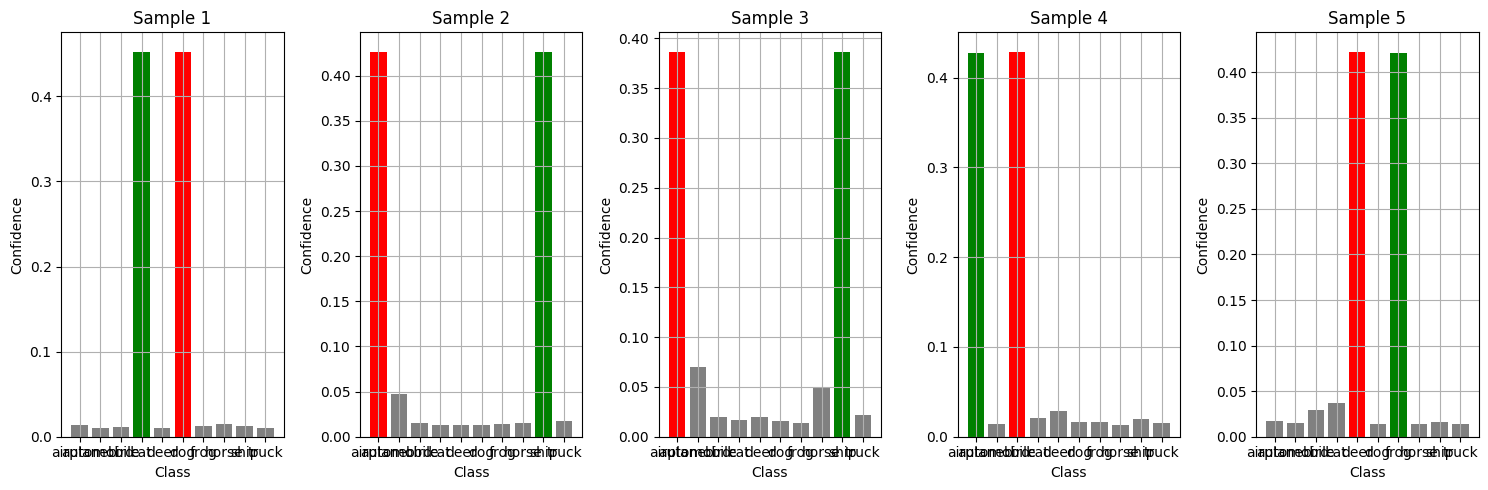

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# Funzione per calcolare la softmax
def softmax(scores):
    # Converte CArray in NumPy array, poi applica softmax
    scores_np = scores.tondarray()  # Converte CArray in NumPy array
    exp_scores = np.exp(scores_np - np.max(scores_np, axis=1, keepdims=True))
    return exp_scores / exp_scores.sum(axis=1, keepdims=True)

# Plot della confidence
for model_id, result in enumerate(results_SDF):
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]
    if successful_attacks.nelement() > 0:
        # Estrai le informazioni necessarie
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        orig_labels = result["true_labels"][successful_attacks]
        adv_labels = result["adv_predictions"][successful_attacks]

        # Controlla che ci siano attacchi efficaci
        effective_attacks = orig_labels != adv_labels
        if effective_attacks.sum() == 0:
            print("Nessun attacco efficace trovato per questo modello.")
            continue

        effective_orig_images = successful_orig_images[effective_attacks]
        effective_orig_labels = orig_labels[effective_attacks]
        effective_adv_labels = adv_labels[effective_attacks]

        # Limitiamo il numero di campioni a 5 per modello
        num_samples = min(5, effective_orig_images.size(0))

        # Genera il plot per ogni campione
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

        for sample_id in range(num_samples):
            # Recupera l'immagine e le etichette
            image = effective_orig_images[sample_id]
            true_label = effective_orig_labels[sample_id].item()
            adv_label = effective_adv_labels[sample_id].item()

            # Converti l'immagine in formato compatibile con il modello
            flattened_image = image.view(-1).unsqueeze(0)  # Appiattisci l'immagine in un array 1D

            # Simula la predizione del modello
            scores = models[model_id].predict(flattened_image, return_decision_function=True)[1]
            confidences = softmax(scores)  # Applica softmax ai punteggi

            # Plot della confidence
            ax = axes[sample_id]
            ax.bar(
                range(len(confidences[0])),
                confidences[0],
                tick_label=dataset_labels,
                color=['green' if i == true_label else 'red' if i == adv_label else 'gray' for i in range(len(confidences[0]))],
            )
            ax.set_title(f"Sample {sample_id + 1}")
            ax.set_xlabel("Class")
            ax.set_ylabel("Confidence")
            ax.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn.functional as F

# Funzione softmax
def softmax(scores):
    return F.softmax(torch.tensor(scores), dim=1).numpy()

# Plot delle confidence per ogni modello
for result in results_SDF:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    # Verifica se ci sono attacchi riusciti
    successful_attacks = result["successful_attacks"]
    if successful_attacks.nelement() > 0:
        attack_paths = result["x_seq"]  # Sequenza dell'attacco
        true_labels = result["true_labels"]
        adv_labels = result["adv_predictions"]

        num_samples = len(attack_paths)
        num_plots = min(5, num_samples)  # Mostra un massimo di 5 campioni

        # Plot della confidence per i campioni selezionati
        fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

        for sample_id in range(num_plots):
            # Estrai la sequenza di attacco e i punteggi
            x_seq = attack_paths[sample_id]  # Sequenza degli input durante l'attacco
            scores = models[model_name].predict(x_seq, return_decision_function=True)[1]

            # Applica il softmax ai punteggi
            confidences = softmax(scores)

            # True class e adversarial class
            true_class = true_labels[sample_id].item()
            adv_class = adv_labels[sample_id].item()

            iterations = np.arange(confidences.shape[0])

            # Plot della confidence
            ax = axes[sample_id]
            ax.plot(iterations, confidences[:, true_class], linestyle='--', label='Confidence True Class')
            ax.plot(iterations, confidences[:, adv_class], label='Confidence Adv. Class')
            ax.set_title(f"Sample {sample_id + 1}")
            ax.set_xlabel("Iteration")
            if sample_id == 0:
                ax.set_ylabel("Confidence")
            ax.legend()
            ax.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")


In [ ]:
def attacks_FGSM(model, data, labels, model_name, epsilon=0.03):
    """
    Genera campioni avversari utilizzando FGSM e registra informazioni utili per l'analisi.

    Args:
        model: Il modello da attaccare.
        data: Tensor contenente i dati di input.
        labels: Tensor contenente le etichette vere.
        model_name: Nome del modello attaccato.
        epsilon: Intensità della perturbazione FGSM.

    Returns:
        results_dict: Dizionario contenente campioni avversari, perturbazioni e altre informazioni utili.
    """


    # Identifica il dispositivo (GPU o CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Utilizzo del dispositivo: {device}")

    # Porta il modello sul dispositivo
    model._model.to(device)

    # Assicurati che i dati siano sul dispositivo corretto
    data = data.to(device, dtype=torch.float32)
    labels = labels.to(device)

    # Imposta il modello in modalità eval
    model._model.eval()

    # Genera campioni avversari
    fgsm_samples = []
    perturbations = []
    for i in range(data.shape[0]):
        try:
            sample = data[i, :].unsqueeze(0)  # Singolo campione
            label = labels[i].unsqueeze(0)   # Singola etichetta

            # Calcola il gradiente rispetto all'ingresso
            sample.requires_grad = True
            output = model._model(sample)
            loss = F.cross_entropy(output, label)
            model._model.zero_grad()
            loss.backward()

            # Genera l'attacco FGSM
            grad_sign = sample.grad.data.sign()
            adversarial = sample + epsilon * grad_sign
            adversarial = torch.clamp(adversarial, 0, 1)  # Clipping per restare nel range valido

            # Calcola la perturbazione
            perturbation = adversarial - sample

            fgsm_samples.append(adversarial.detach().cpu())
            perturbations.append(perturbation.detach().cpu())
        except Exception as e:
            print(f"Errore nel generare campione avversario per l'indice {i}: {e}")
            continue

    # Converte i risultati in tensori
    fgsm_samples = torch.cat(fgsm_samples, dim=0) if fgsm_samples else torch.tensor([])
    perturbations = torch.cat(perturbations, dim=0) if perturbations else torch.tensor([])

    # Calcola le predizioni sui campioni originali e avversari
    with torch.no_grad():
        orig_predictions = model._model(data).argmax(dim=1)
        adv_predictions = model._model(fgsm_samples.to(device)).argmax(dim=1)

    # Identifica campioni per cui l'attacco ha avuto successo
    successful_attacks = (orig_predictions != adv_predictions).nonzero(as_tuple=True)[0]
    failed_attacks = (orig_predictions == adv_predictions).nonzero(as_tuple=True)[0]

    # Calcola l'accuratezza sui campioni originali e avversari
    orig_accuracy = (orig_predictions == labels).float().mean().item()
    adv_accuracy = (adv_predictions == labels).float().mean().item()

    # Verifica e assegna valori predefiniti se mancano dati
    results_dict = {
        "model_name": model_name,
        "adversarial_samples": fgsm_samples,
        "perturbations": perturbations,
        "true_labels": labels.detach().cpu(),
        "orig_predictions": orig_predictions.detach().cpu(),
        "adv_predictions": adv_predictions.detach().cpu(),
        "successful_attacks": successful_attacks.detach().cpu(),
        "failed_attacks": failed_attacks.detach().cpu(),
        "orig_accuracy": orig_accuracy,
        "adv_accuracy": adv_accuracy
    }

    return results_dict


In [ ]:
# Controlla se il file 'results_FGSM.pkl' esiste
if os.path.exists('/content/results_FGSM.pkl'):
    print("Il file 'results_FGSM' esiste già. Caricamento dei risultati salvati...")
    try:
        with open('/content/results_FGSM.pkl', 'rb') as f:
            results_FGSM = pickle.load(f)
            if isinstance(results_FGSM, list) and all(isinstance(r, dict) for r in results_FGSM):
                print("Risultati caricati correttamente.")
            else:
                print("Attenzione: il formato dei dati caricati non è quello previsto.")
    except Exception as e:
        print(f"Errore durante il caricamento: {e}")
else:
    # Se il file non esiste, esegui gli attacchi e salva i risultati
    results_FGSM = []
    for idx, model in enumerate(models):
        print(f"Analizzando il modello \"{model_names[idx]}\"...")
        try:
            # Genera i risultati per il modello attuale
            result = attacks_FGSM(model, data_tensor, labels_tensor, model_names[idx])
            results_FGSM.append(result)  # Aggiunge il risultato alla lista
            print(f"Modello: {model_names[idx]} completato.")
        except Exception as e:
            print(f"Errore durante l'analisi del modello {model_names[idx]}: {e}")
            continue

    # Salva i risultati in 'results_FGSM.pkl'
    try:
        with open('/content/results_FGSM.pkl', 'wb') as f:
            pickle.dump(results_FGSM, f)
            print("Risultati salvati nel file 'results_FGSM.pkl'.")
    except Exception as e:
        print(f"Errore durante il salvataggio dei risultati: {e}")


Il file 'results_FGSM' esiste già. Caricamento dei risultati salvati...
Risultati caricati correttamente.


In [ ]:
print(results_FGSM)

[{'model_name': 'Standard', 'adversarial_samples': tensor([[[[0.5896, 0.6535, 0.6771,  ..., 0.5073, 0.4641, 0.4849],
          [0.5661, 0.6222, 0.5935,  ..., 0.5033, 0.5202, 0.4367],
          [0.5622, 0.5622, 0.6496,  ..., 0.5151, 0.4798, 0.5006],
          ...,
          [0.2367, 0.1947, 0.0916,  ..., 0.1790, 0.0210, 0.1269],
          [0.2092, 0.1622, 0.1673,  ..., 0.0720, 0.0837, 0.1084],
          [0.2418, 0.1896, 0.1465,  ..., 0.1241, 0.1033, 0.1124]],

         [[0.4692, 0.4653, 0.4849,  ..., 0.4025, 0.3869, 0.3033],
          [0.4092, 0.4614, 0.4171,  ..., 0.3425, 0.3869, 0.3151],
          [0.4014, 0.3975, 0.4053,  ..., 0.3543, 0.3425, 0.3790],
          ...,
          [0.4563, 0.4222, 0.3751,  ..., 0.4104, 0.2810, 0.3633],
          [0.4249, 0.3700, 0.3633,  ..., 0.2916, 0.2916, 0.2810],
          [0.4496, 0.3818, 0.3790,  ..., 0.3320, 0.2994, 0.2327]],

         [[0.2222, 0.1543, 0.2300,  ..., 0.1712, 0.1112, 0.0994],
          [0.2300, 0.1869, 0.1465,  ..., 0.0916, 0.1555, 

In [ ]:
# Itera sugli elementi della lista
for idx, result in enumerate(results_FGSM):
    print(f"Risultati per il modello {idx + 1} Attacco FGSM:")

    model_name = result.get("model_name", "Modello sconosciuto")
    orig_accuracy = result.get("orig_accuracy", 0.0)
    adv_accuracy = result.get("adv_accuracy", 0.0)
    successful_attacks = result.get("successful_attacks", [])
    failed_attacks = result.get("failed_attacks", [])
    perturbations = result.get("perturbations", torch.tensor([]))

    print(f"Model Name: {model_name}")
    print(f"Original Accuracy: {orig_accuracy * 100:.2f}%")
    print(f"Adversarial Accuracy: {adv_accuracy * 100:.2f}%")

    num_successful = len(successful_attacks)
    num_failed = len(failed_attacks)
    print(f"Numero di attacchi riusciti: {num_successful}")
    print(f"Numero di attacchi falliti: {num_failed}")

    # Calcola la percentuale di successo degli attacchi
    total_attacks = num_successful + num_failed
    if total_attacks > 0:
        success_rate = (num_successful / total_attacks) * 100
        print(f"Percentuale di successo degli attacchi: {success_rate:.2f}%")
    else:
        print("Nessun attacco disponibile per calcolare la percentuale di successo.")

    print("-" * 50)

    # Analizza le perturbazioni generate
    if perturbations.nelement() > 0:
        avg_perturbation_magnitude = torch.mean(torch.norm(perturbations.view(perturbations.size(0), -1), dim=1))
        print(f"Magnitude media delle perturbazioni: {avg_perturbation_magnitude:.4f}")
        print(f"Numero di perturbazioni generate: {perturbations.size(0)}")
    else:
        print("Nessuna perturbazione disponibile nei dati.")

    print("=" * 80)


Risultati per il modello 1 Attacco FGSM:
Model Name: Standard
Original Accuracy: 92.19%
Adversarial Accuracy: 31.25%
Numero di attacchi riusciti: 39
Numero di attacchi falliti: 25
Percentuale di successo degli attacchi: 60.94%
--------------------------------------------------
Magnitude media delle perturbazioni: 1.6520
Numero di perturbazioni generate: 64
Risultati per il modello 2 Attacco FGSM:
Model Name: Ding2020MMA
Original Accuracy: 84.38%
Adversarial Accuracy: 46.88%
Numero di attacchi riusciti: 24
Numero di attacchi falliti: 40
Percentuale di successo degli attacchi: 37.50%
--------------------------------------------------
Magnitude media delle perturbazioni: 1.6519
Numero di perturbazioni generate: 64
Risultati per il modello 3 Attacco FGSM:
Model Name: Rony2019Decoupling
Original Accuracy: 87.50%
Adversarial Accuracy: 42.19%
Numero di attacchi riusciti: 29
Numero di attacchi falliti: 35
Percentuale di successo degli attacchi: 45.31%
------------------------------------------

In [ ]:
for idx, result in enumerate(results_FGSM):
    failed_indices = result["failed_attacks"]
    orig_preds = result["orig_predictions"][failed_indices]
    adv_preds = result["adv_predictions"][failed_indices]
    print(f"Model {result['model_name']}:")
    print(f"Original predictions: {orig_preds}")
    print(f"Adversarial predictions: {adv_preds}")


for idx, result in enumerate(results_FGSM):
    failed_indices = result["failed_attacks"]
    failed_labels = result["true_labels"][failed_indices]
    adv_preds_failed = result["adv_predictions"][failed_indices]
    correct_failed = (failed_labels == adv_preds_failed).sum().item()
    print(f"Model {result['model_name']}:")
    print(f"Correct predictions among failed attacks: {correct_failed}")


Model Standard:
Original predictions: tensor([3, 6, 6, 3, 9, 7, 6, 8, 6, 9, 9, 9, 9, 5, 6, 6, 0, 9, 7, 5, 8, 8, 3, 7,
        5])
Adversarial predictions: tensor([3, 6, 6, 3, 9, 7, 6, 8, 6, 9, 9, 9, 9, 5, 6, 6, 0, 9, 7, 5, 8, 8, 3, 7,
        5])
Model Ding2020MMA:
Original predictions: tensor([8, 0, 6, 6, 3, 9, 3, 7, 9, 8, 5, 7, 6, 1, 0, 9, 4, 0, 9, 6, 6, 9, 1, 9,
        9, 5, 4, 6, 0, 9, 6, 9, 8, 8, 3, 5, 7, 5, 6, 9])
Adversarial predictions: tensor([8, 0, 6, 6, 3, 9, 3, 7, 9, 8, 5, 7, 6, 1, 0, 9, 4, 0, 9, 6, 6, 9, 1, 9,
        9, 5, 4, 6, 0, 9, 6, 9, 8, 8, 3, 5, 7, 5, 6, 9])
Model Rony2019Decoupling:
Original predictions: tensor([0, 1, 0, 9, 3, 7, 9, 8, 5, 7, 8, 6, 7, 9, 4, 0, 6, 8, 9, 3, 9, 5, 4, 6,
        6, 9, 8, 8, 8, 5, 3, 7, 5, 6, 9])
Adversarial predictions: tensor([0, 1, 0, 9, 3, 7, 9, 8, 5, 7, 8, 6, 7, 9, 4, 0, 6, 8, 9, 3, 9, 5, 4, 6,
        6, 9, 8, 8, 8, 5, 3, 7, 5, 6, 9])
Model Rice2020Overfitting:
Original predictions: tensor([0, 9, 7, 9, 8, 7, 6, 0, 0, 9, 4, 6, 2, 


Analisi per il modello: Standard
Magnitude media perturbazioni attacchi riusciti: 1.6501


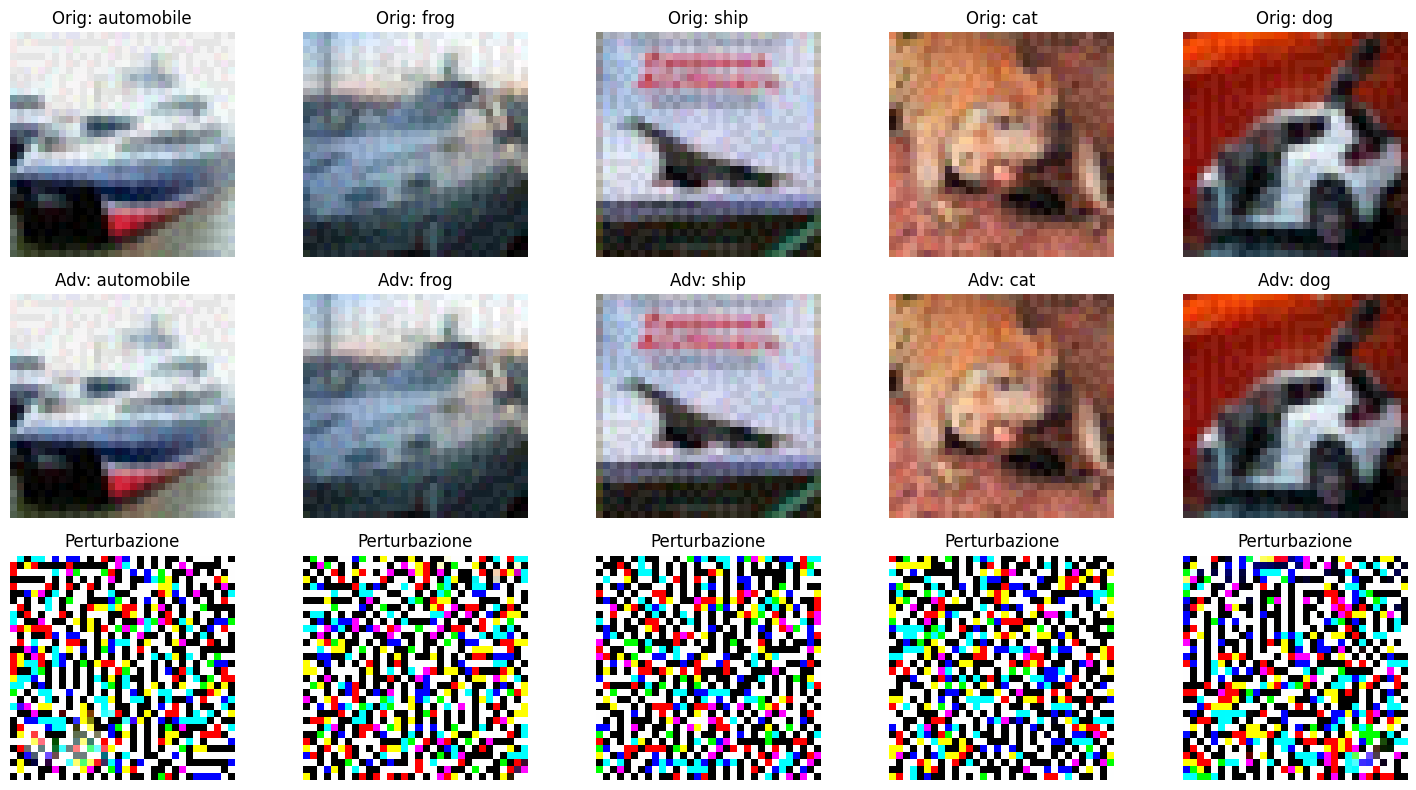


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi riusciti: 1.6511


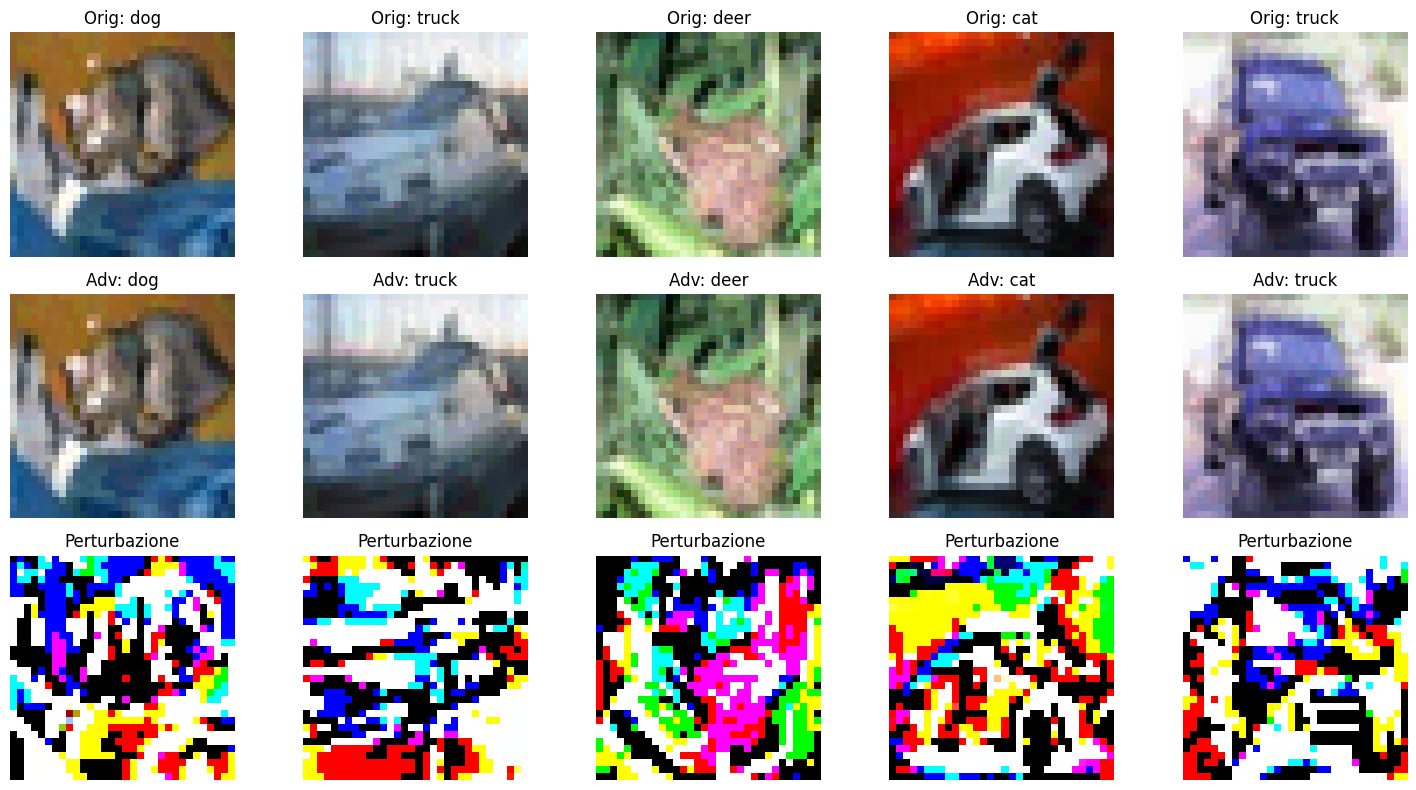


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi riusciti: 1.6551


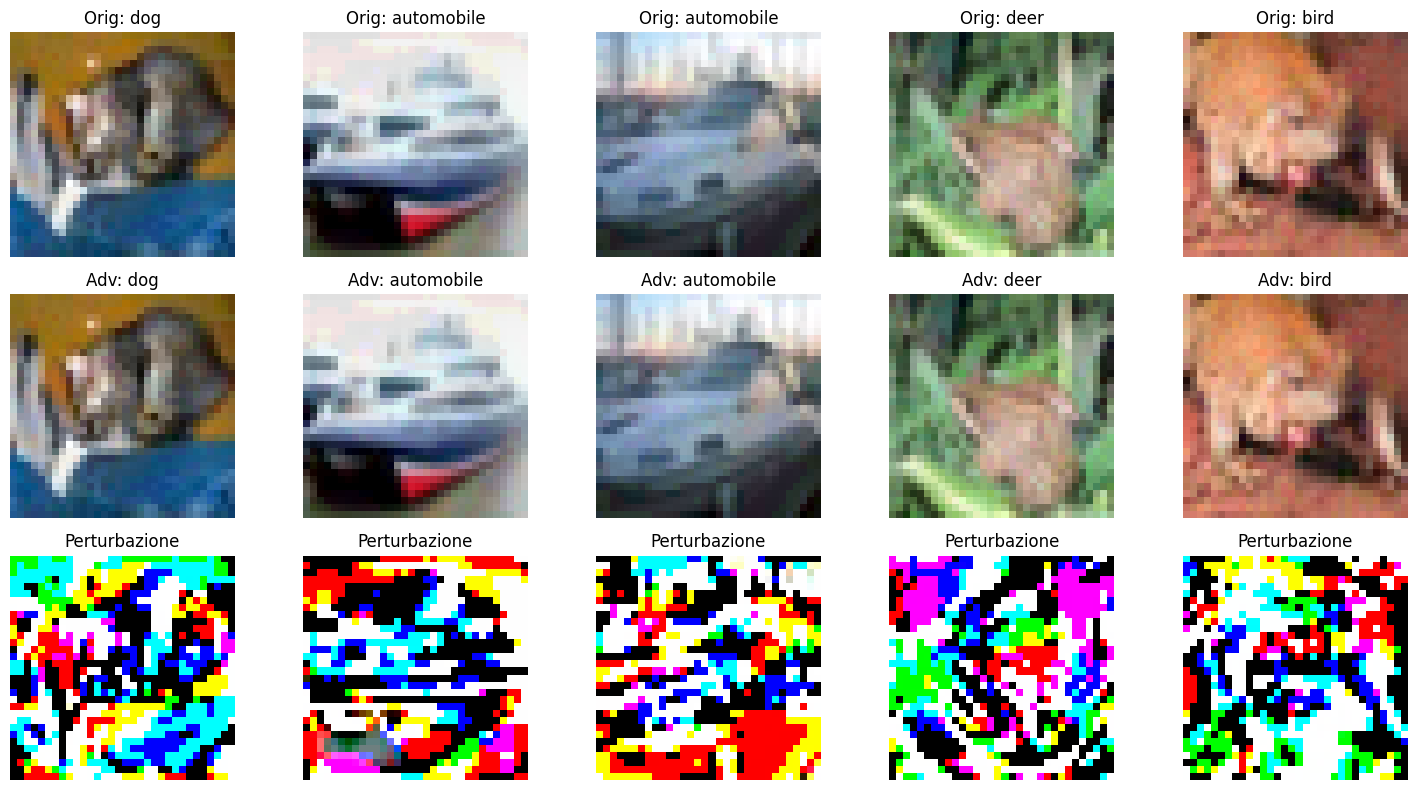


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi riusciti: 1.6511


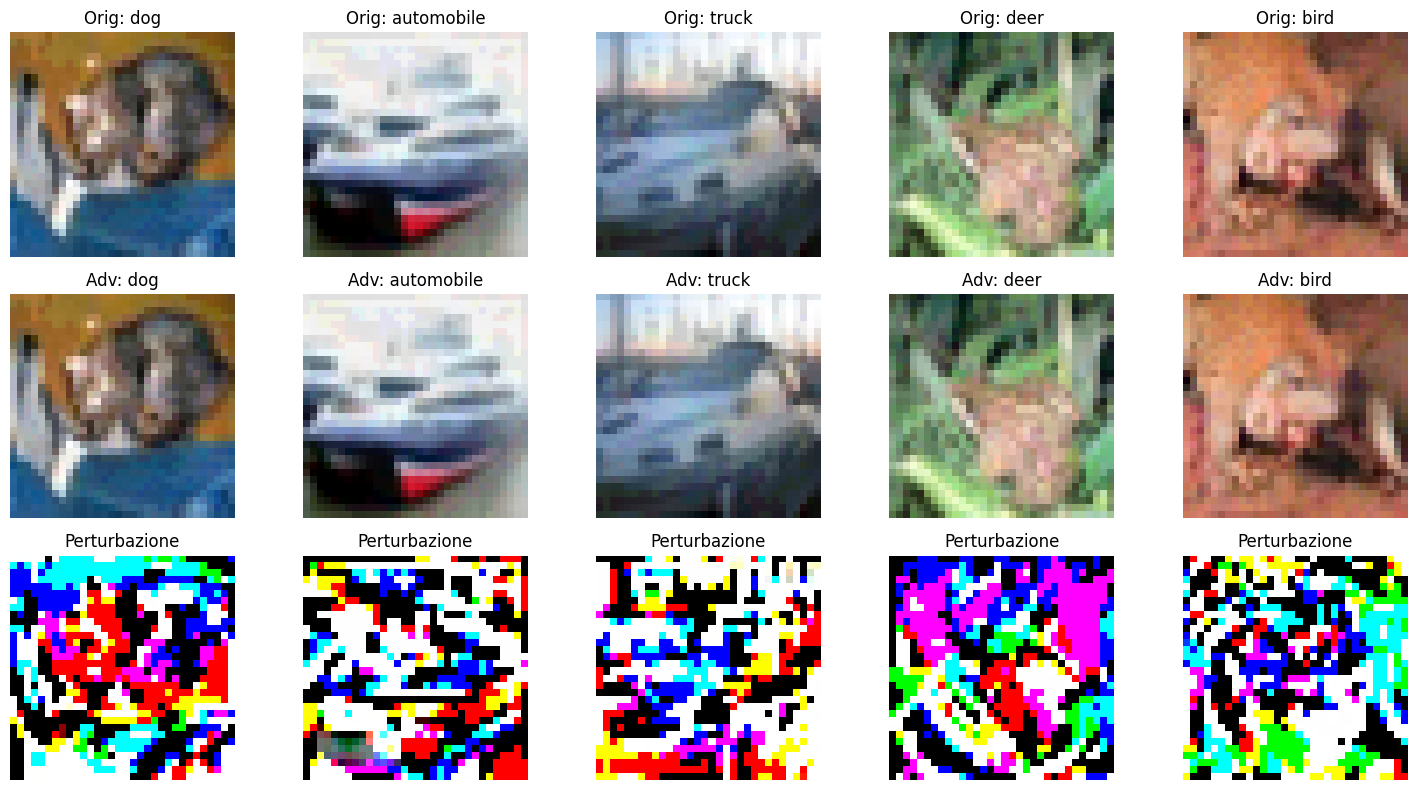


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi riusciti: 1.6621


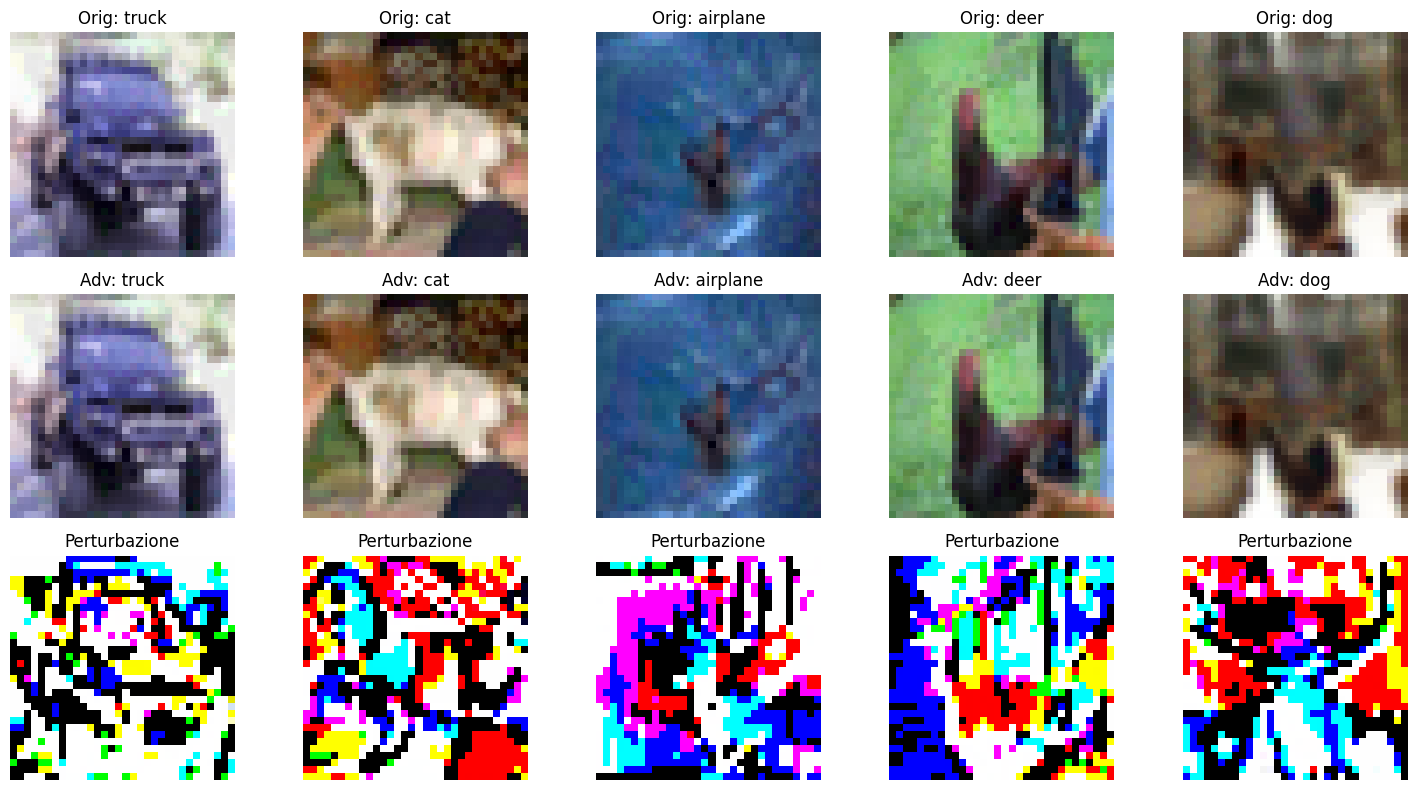

In [ ]:
import matplotlib.pyplot as plt


# Normalizza l'immagine tra 0 e 1 per la visualizzazione
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# Elenco delle etichette del dataset
dataset_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

for result in results_FGSM:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]
    failed_attacks = result["failed_attacks"]

    if successful_attacks.nelement() > 0:
        # Immagini originali e avversarie
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        successful_adv_labels = result["adv_predictions"][successful_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        avg_perturbation_magnitude_successful = torch.mean(torch.norm(successful_perturbations.view(successful_perturbations.size(0), -1), dim=1)).item()
        print(f"Magnitude media perturbazioni attacchi riusciti: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, successful_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        fig, axes = plt.subplots(3, num_images, figsize=(15, 8))

        for i in range(num_images):
            # Etichette come stringhe
            orig_label = dataset_labels[successful_adv_labels[i].item()]
            adv_label = dataset_labels[successful_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(successful_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label}")
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(successful_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label}")
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(successful_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione")
            axes[2, i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")



Analisi per il modello: Standard
Magnitude media perturbazioni attacchi efficaci: 1.6501


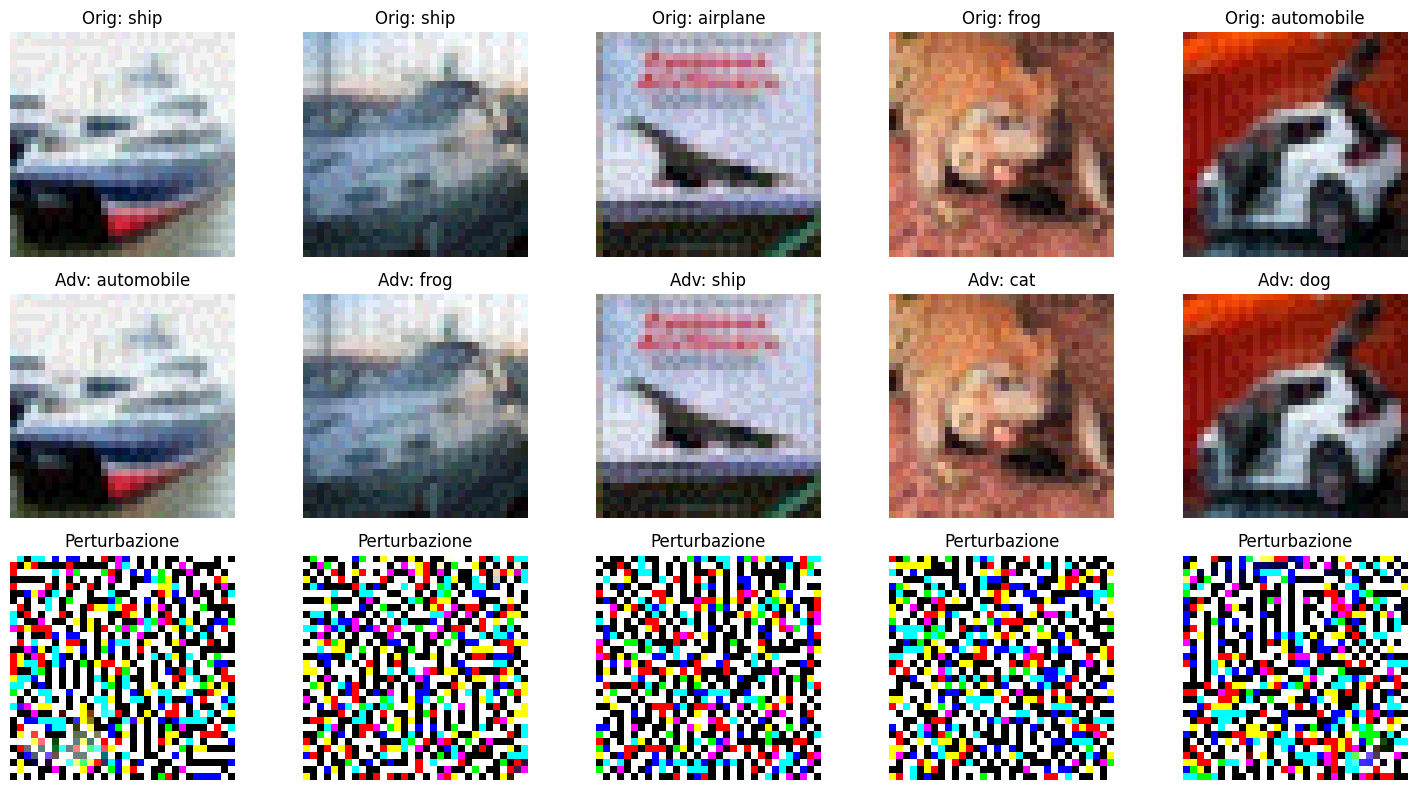


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi efficaci: 1.6511


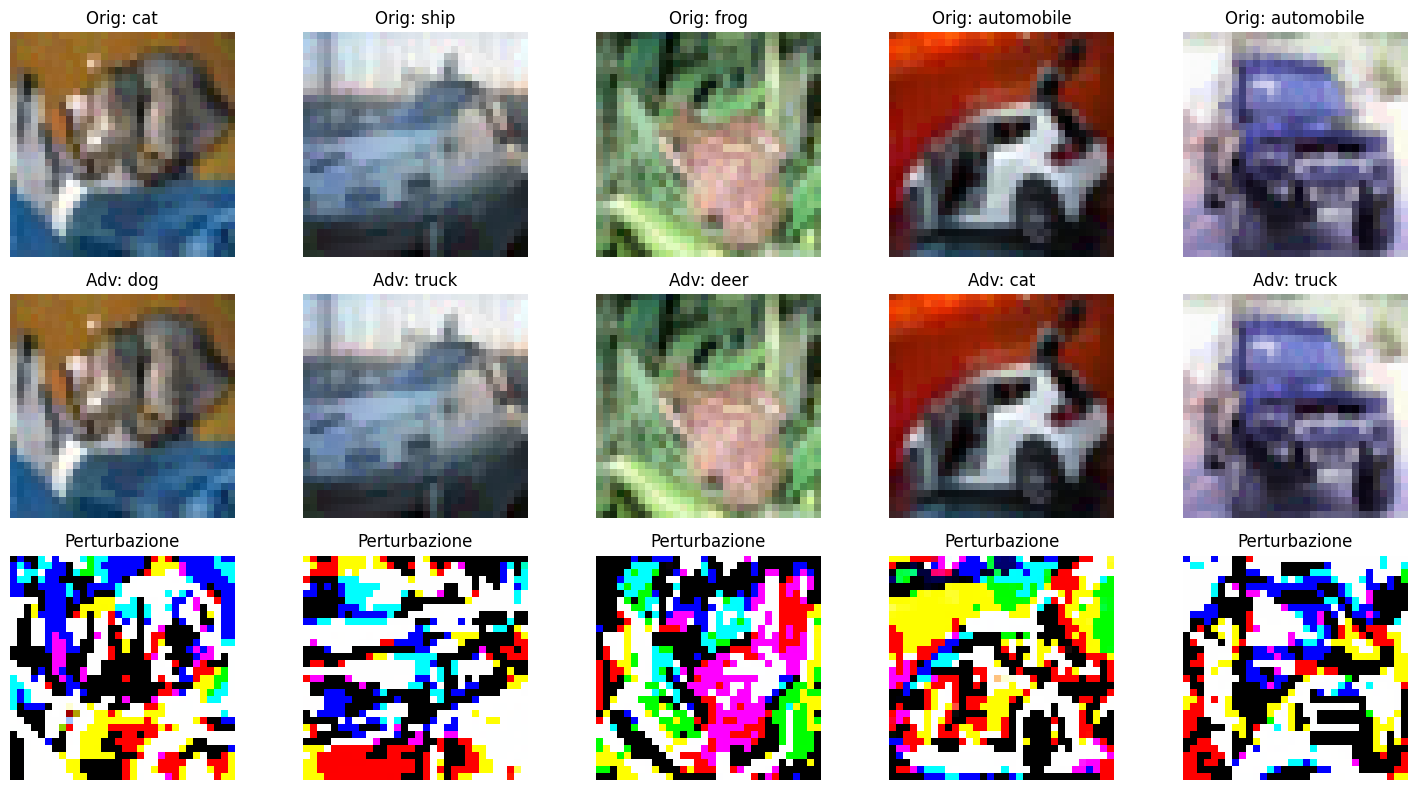


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi efficaci: 1.6551


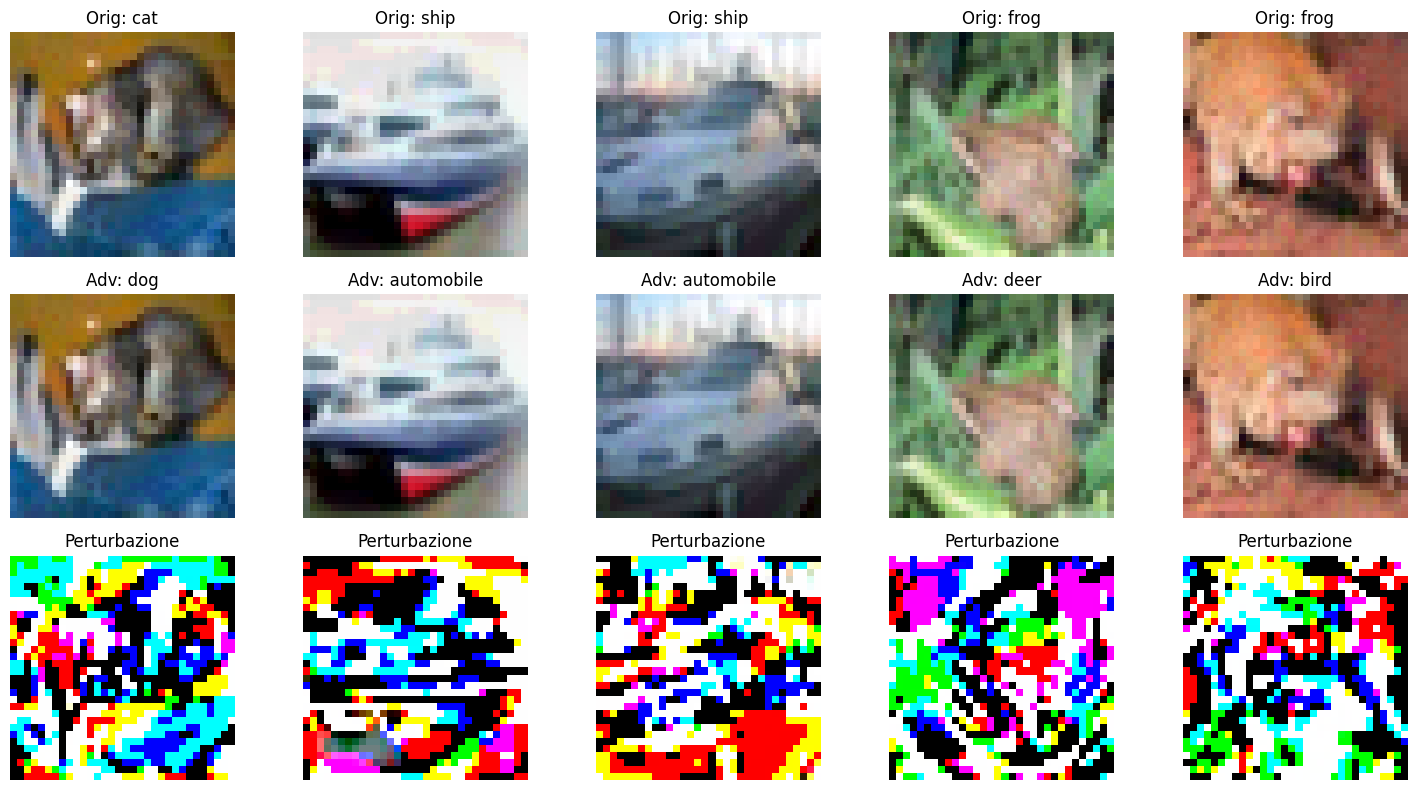


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi efficaci: 1.6511


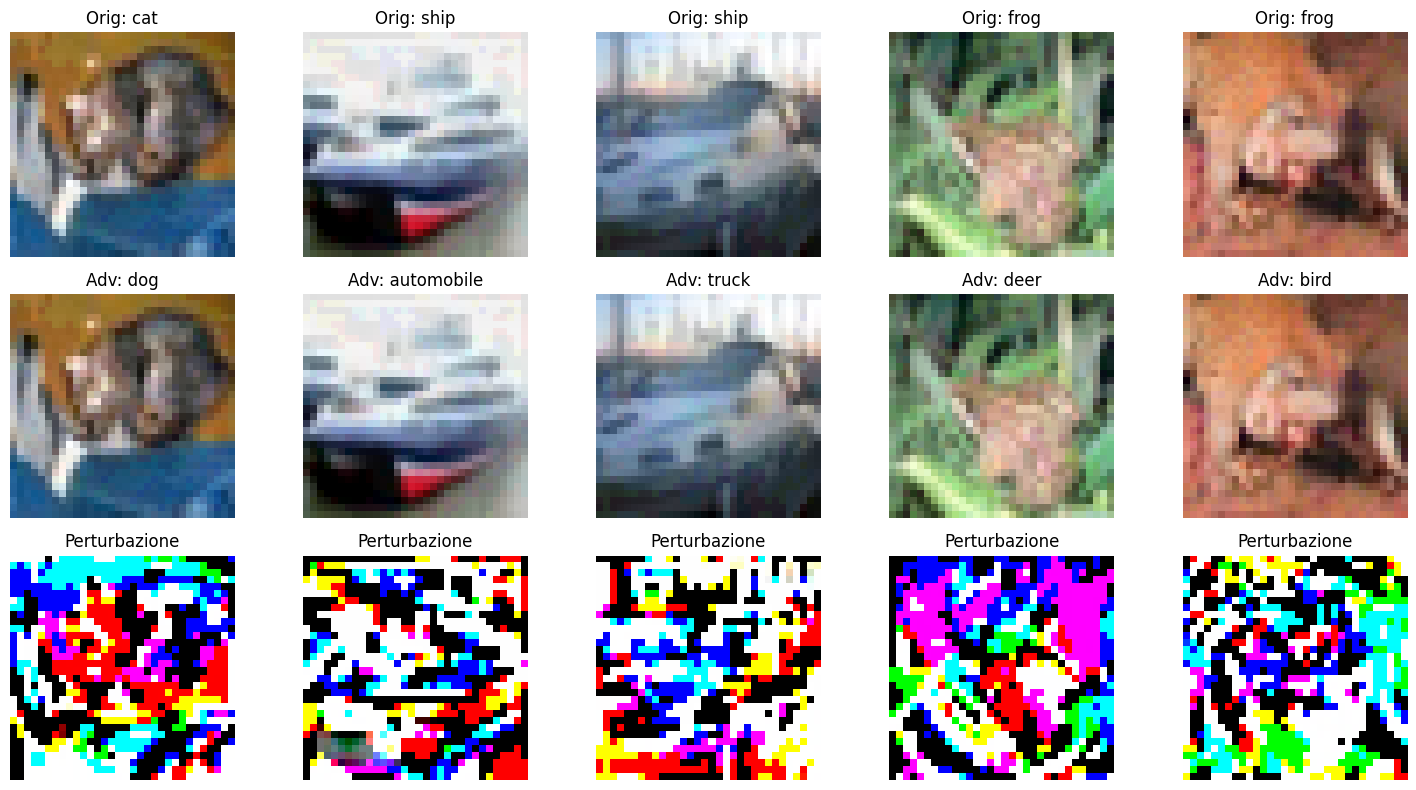


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi efficaci: 1.6621


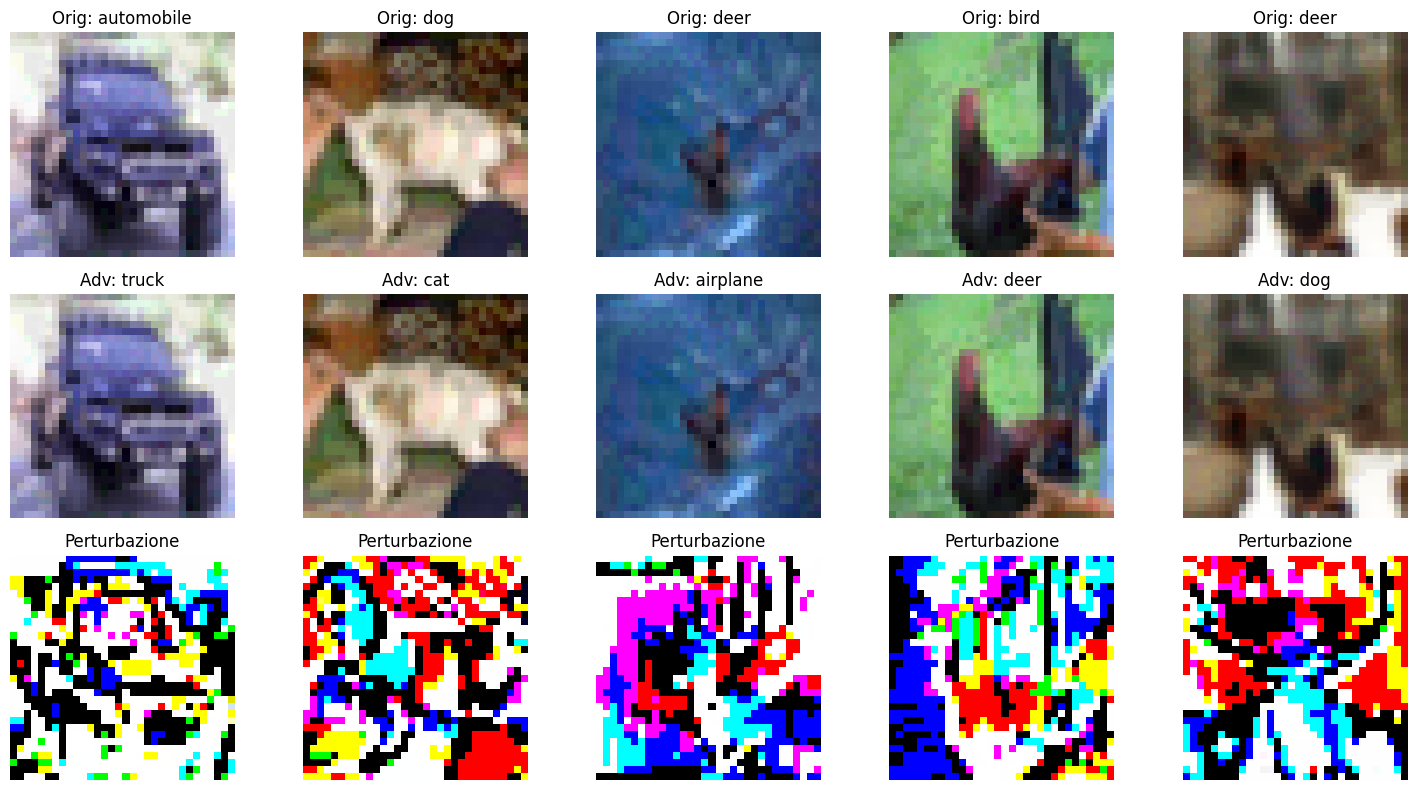

In [ ]:
# Normalizza l'immagine tra 0 e 1 per la visualizzazione
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# Elenco delle etichette del dataset
dataset_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

for result in results_FGSM:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]

    if successful_attacks.nelement() > 0:
        # Estrai le immagini e le predizioni per gli attacchi riusciti
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        orig_labels = result["true_labels"][successful_attacks]
        adv_labels = result["adv_predictions"][successful_attacks]

        # Filtra i campioni in cui l'attacco è stato efficace
        effective_attacks = orig_labels != adv_labels
        if effective_attacks.sum() == 0:
            print("Nessun attacco efficace trovato per questo modello.")
            continue

        effective_orig_images = successful_orig_images[effective_attacks]
        effective_adv_images = successful_adv_images[effective_attacks]
        effective_orig_labels = orig_labels[effective_attacks]
        effective_adv_labels = adv_labels[effective_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        effective_perturbations = successful_perturbations[effective_attacks]
        avg_perturbation_magnitude_successful = torch.mean(torch.norm(effective_perturbations.view(effective_perturbations.size(0), -1), dim=1)).item()
        print(f"Magnitude media perturbazioni attacchi efficaci: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, effective_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        fig, axes = plt.subplots(3, num_images, figsize=(15, 8))

        for i in range(num_images):
            # Etichette come stringhe
            orig_label_str = dataset_labels[effective_orig_labels[i].item()]
            adv_label_str = dataset_labels[effective_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(effective_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label_str}")
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(effective_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label_str}")
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(effective_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione")
            axes[2, i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Nessun attacco riuscito trovato per il modello.")



Analisi per il modello: Standard
Magnitude media perturbazioni attacchi riusciti: 1.6501


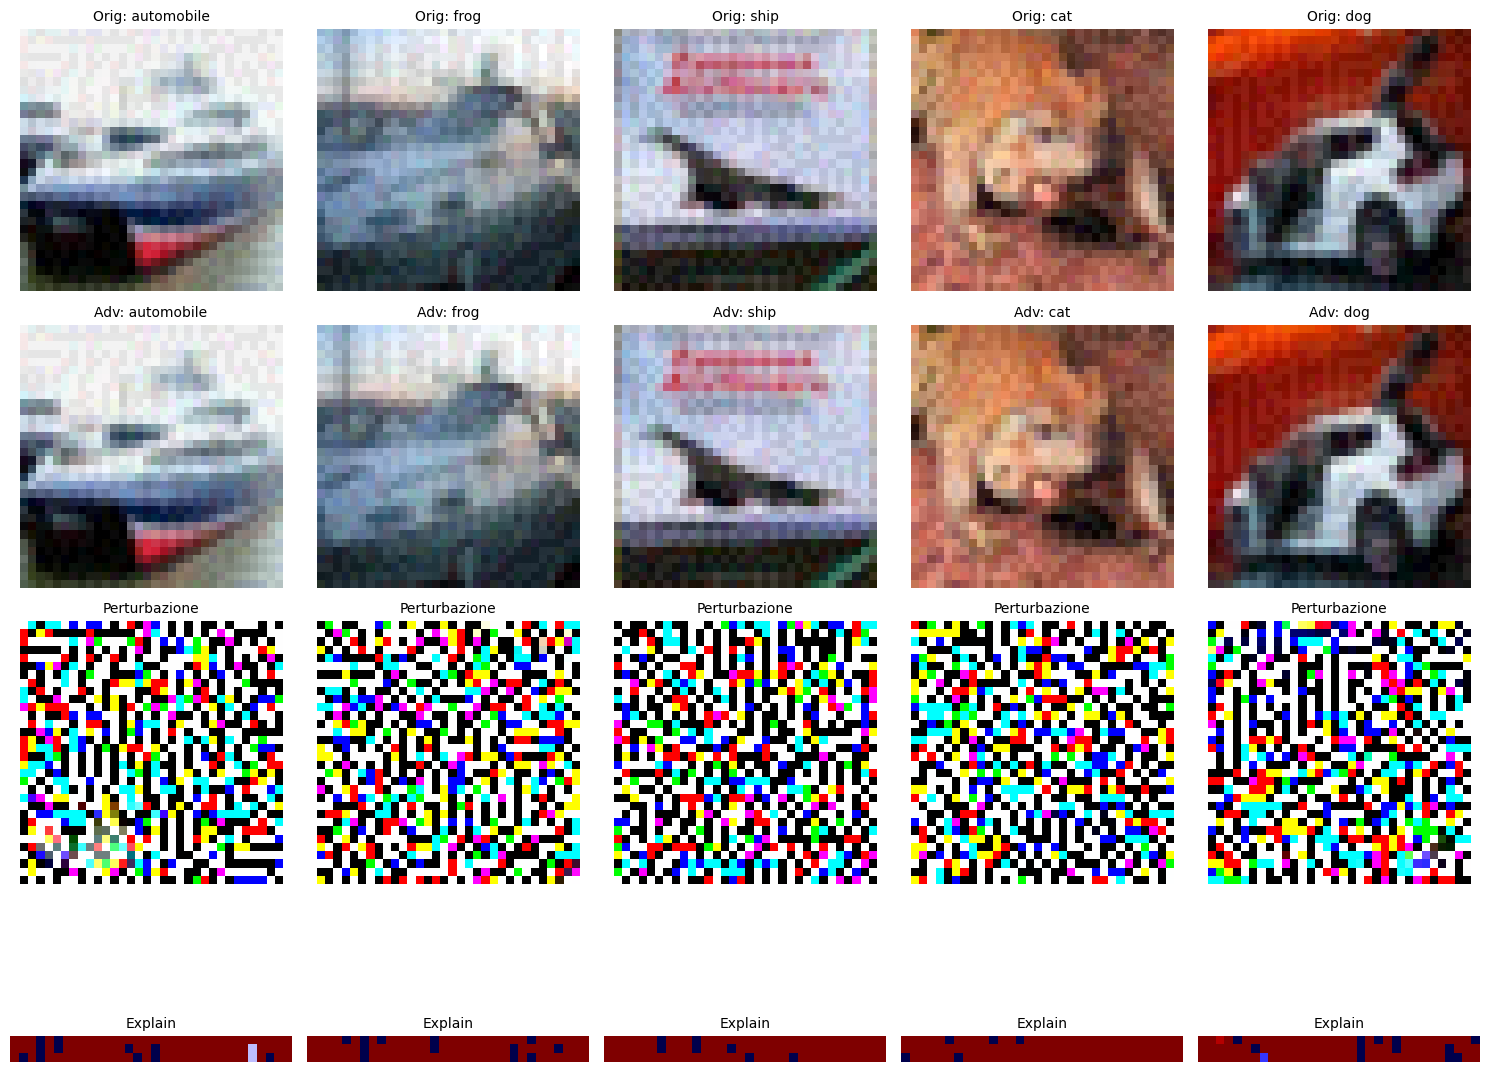


Analisi per il modello: Ding2020MMA
Magnitude media perturbazioni attacchi riusciti: 1.6511


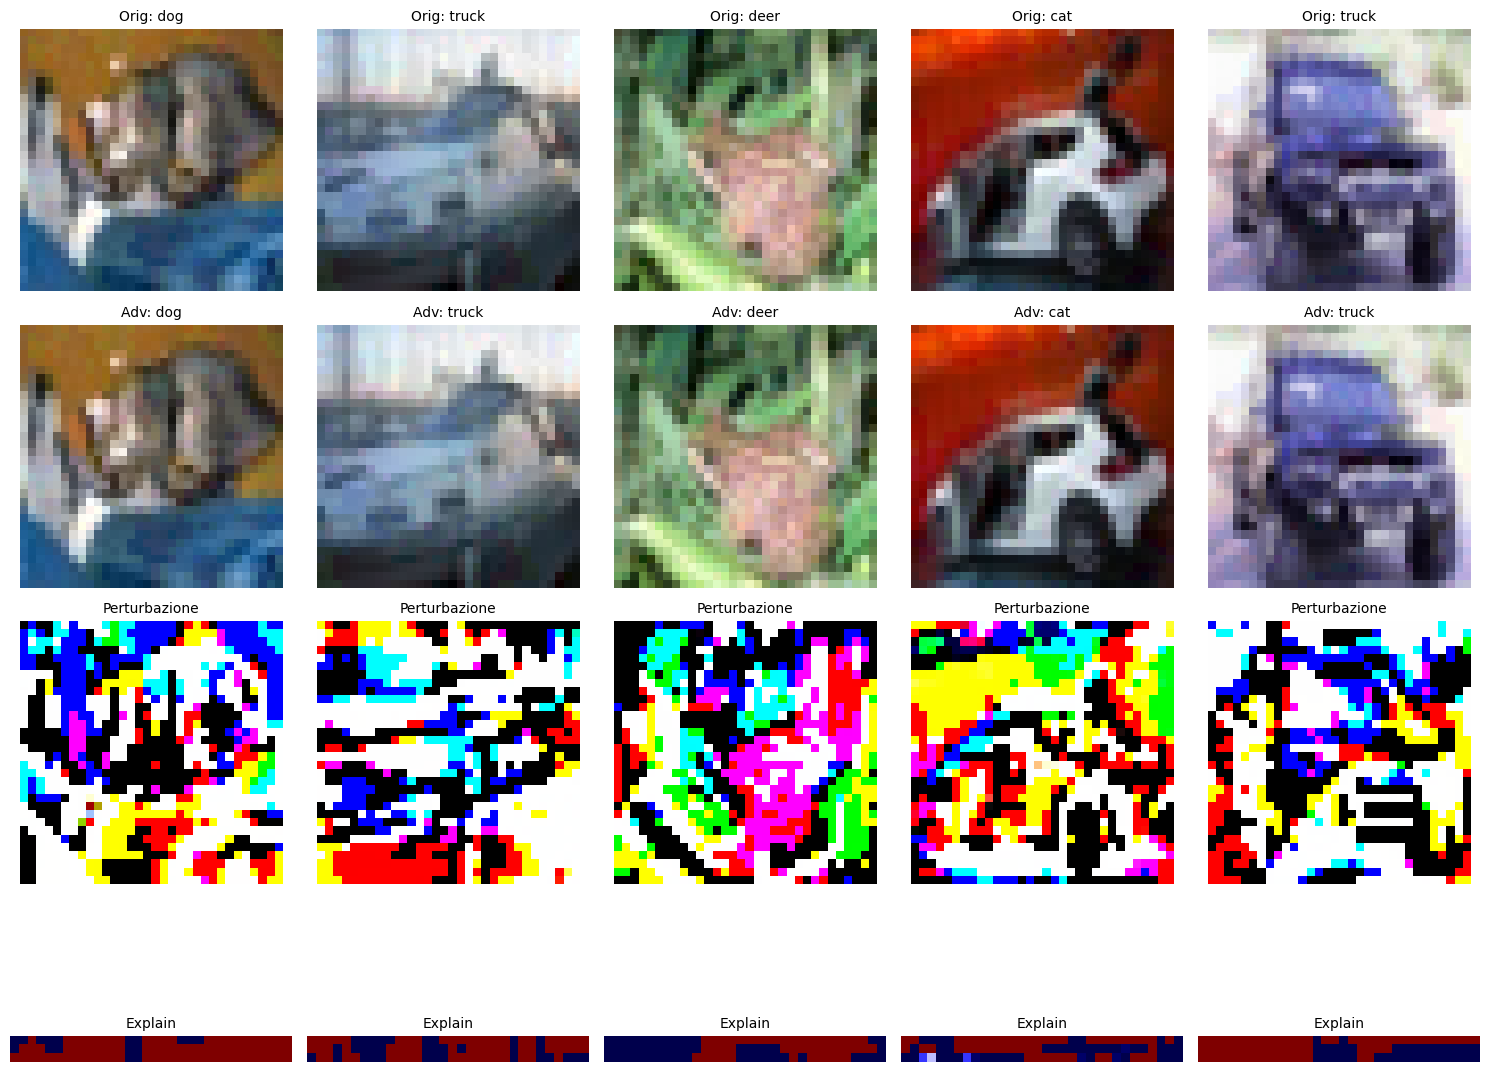


Analisi per il modello: Rony2019Decoupling
Magnitude media perturbazioni attacchi riusciti: 1.6551


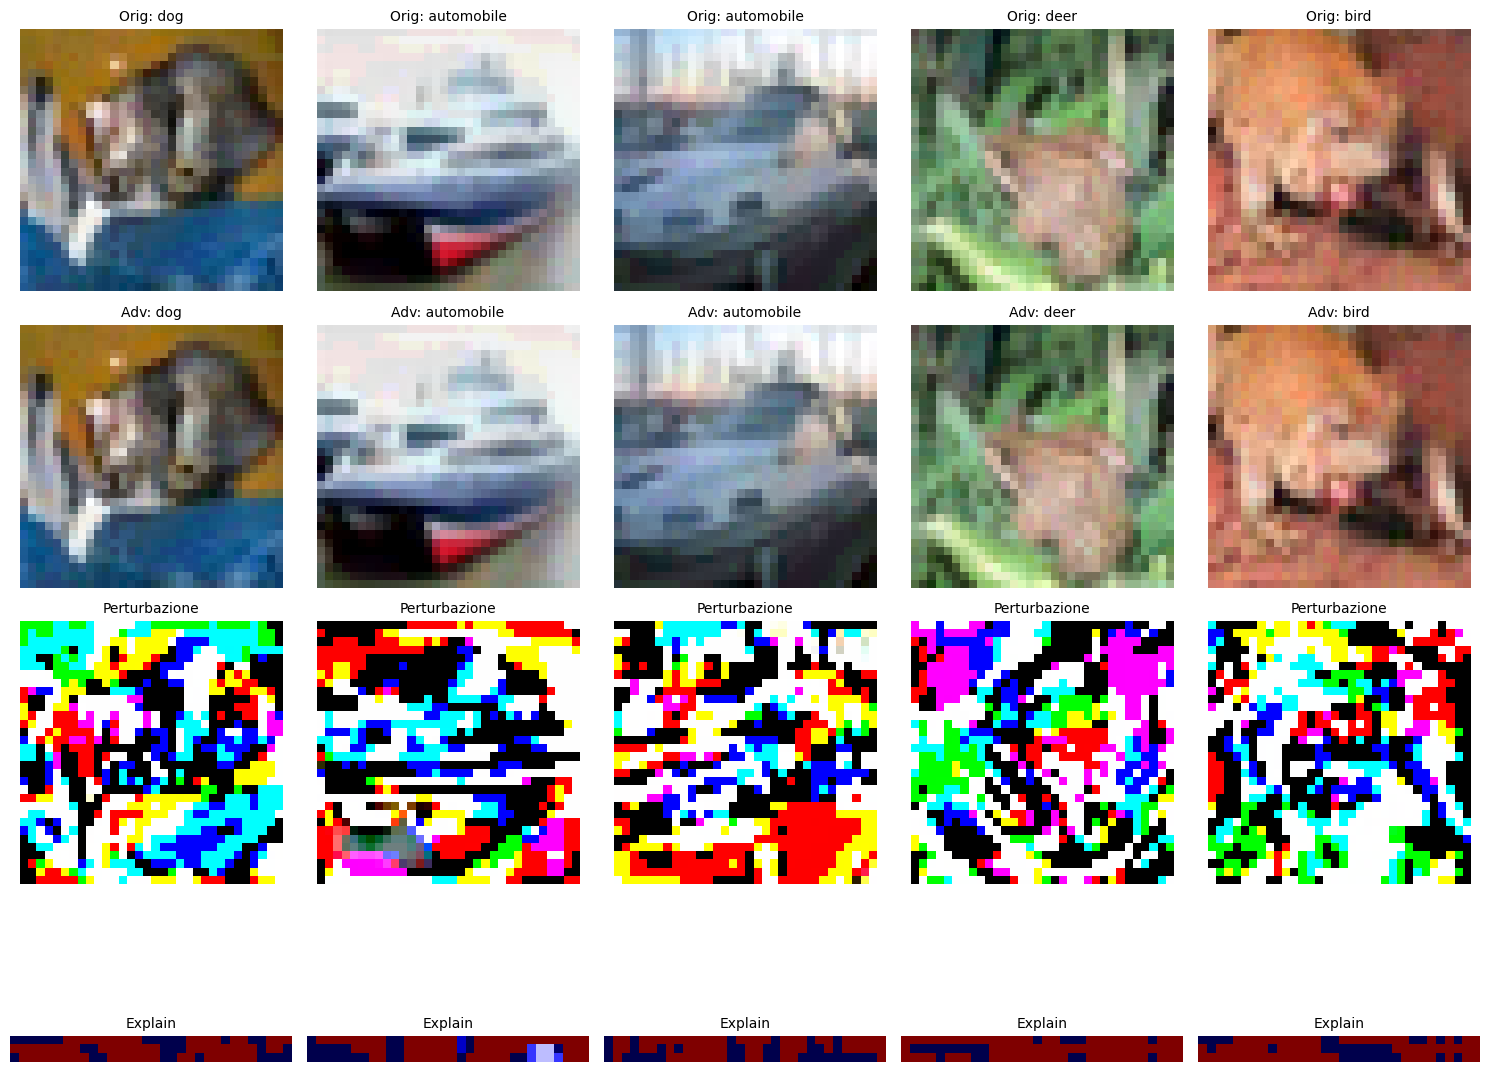


Analisi per il modello: Rice2020Overfitting
Magnitude media perturbazioni attacchi riusciti: 1.6511


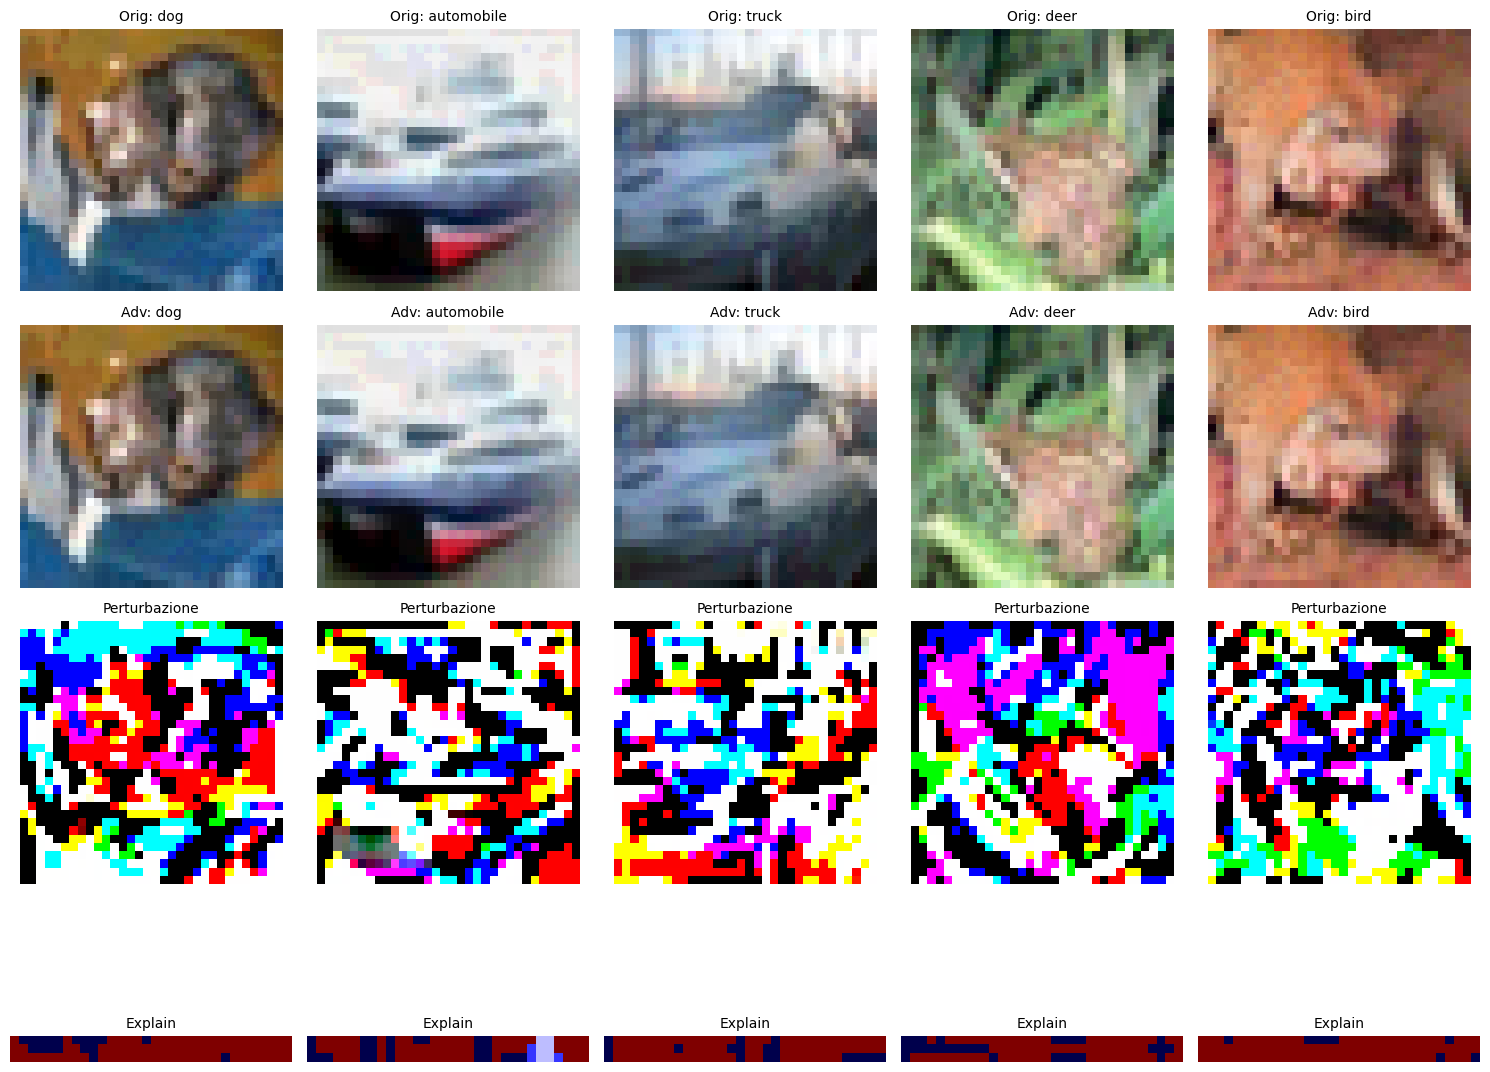


Analisi per il modello: Wang2023Better_WRN-70-16
Magnitude media perturbazioni attacchi riusciti: 1.6621


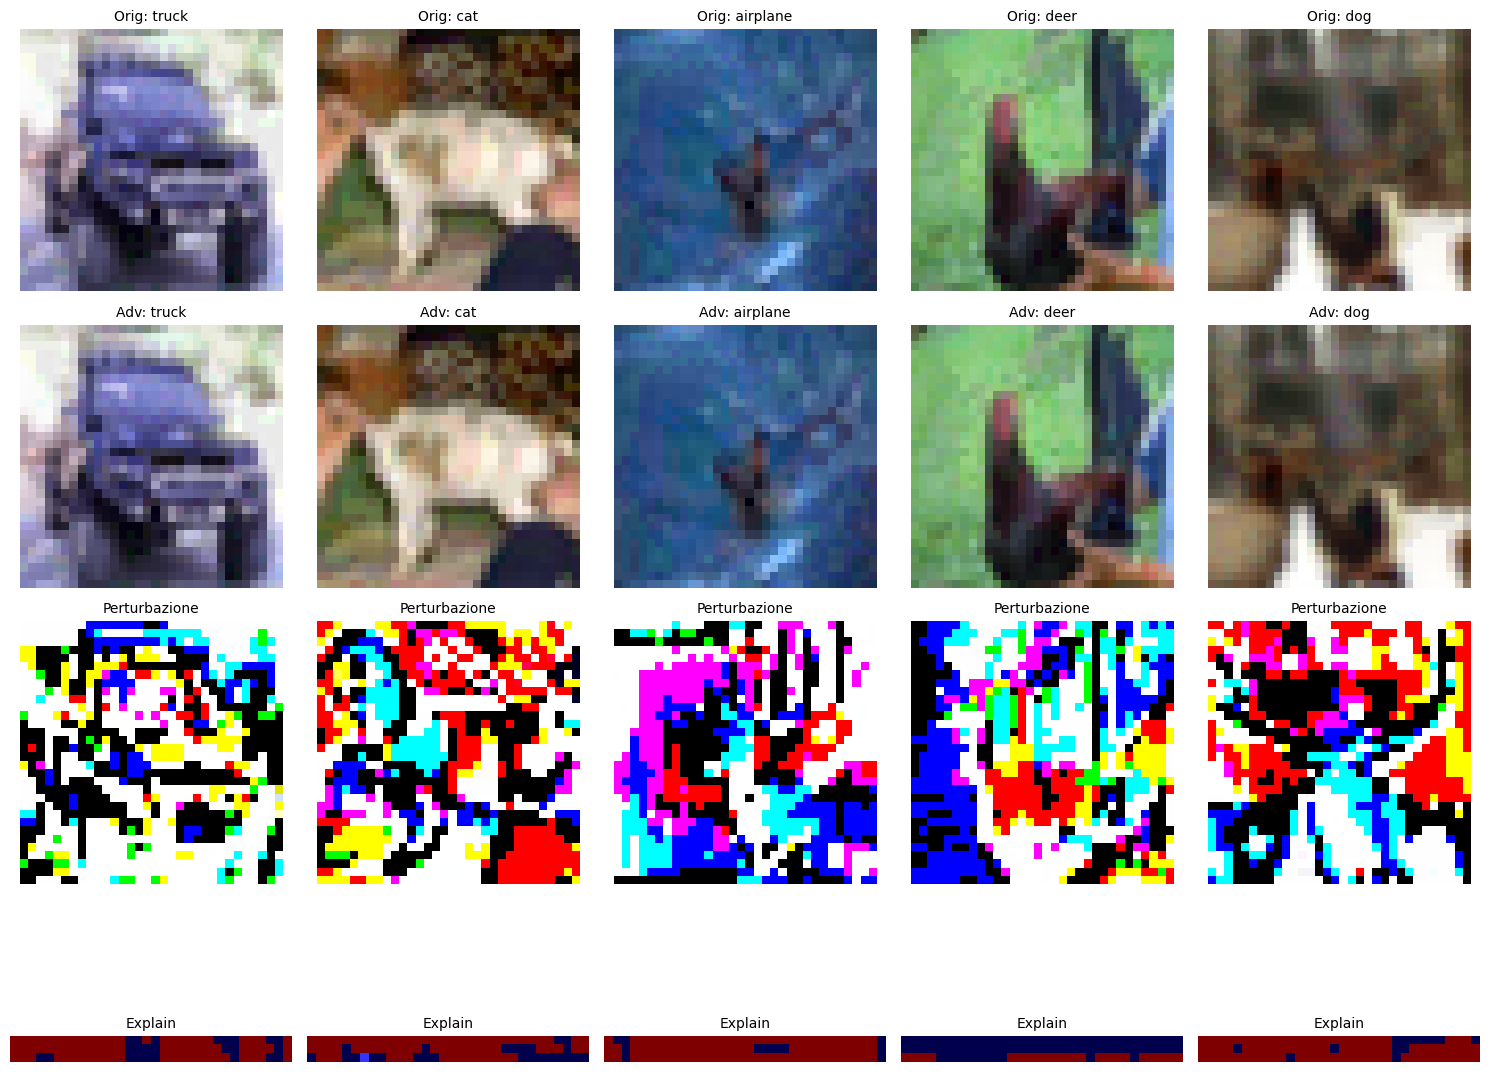

In [ ]:
# Funzione per calcolare la spiegazione: massimo errore per pixel
def calculate_explainability(perturbation):
    """
    Calcola la massima componente assoluta per pixel da una perturbazione.
    Funziona sia per immagini RGB che in scala di grigi.
    """
    # Se il dato è un tensore PyTorch, converti in NumPy
    if isinstance(perturbation, torch.Tensor):
        perturbation = perturbation.cpu().numpy()

    # Calcolo del massimo errore per pixel
    if perturbation.ndim == 3:  # Per immagini RGB
        r = np.abs(perturbation[:, :, 0])
        g = np.abs(perturbation[:, :, 1])
        b = np.abs(perturbation[:, :, 2])
        expl = np.maximum(np.maximum(r, g), b)
    else:  # Per immagini in scala di grigi
        expl = np.abs(perturbation)

    return expl

for result in results_FGSM:
    model_name = result["model_name"]
    print(f"\nAnalisi per il modello: {model_name}")

    successful_attacks = result["successful_attacks"]
    failed_attacks = result["failed_attacks"]

    if successful_attacks.nelement() > 0:
        # Immagini originali e avversarie
        successful_orig_images = result["adversarial_samples"][successful_attacks]
        successful_adv_images = result["adversarial_samples"][successful_attacks]
        successful_adv_labels = result["adv_predictions"][successful_attacks]

        # Perturbazioni
        successful_perturbations = result["perturbations"][successful_attacks]
        avg_perturbation_magnitude_successful = torch.mean(torch.norm(successful_perturbations.view(successful_perturbations.size(0), -1), dim=1)).item()
        print(f"Magnitude media perturbazioni attacchi riusciti: {avg_perturbation_magnitude_successful:.4f}")

        # Visualizza immagini e perturbazioni
        num_images = min(5, successful_adv_images.size(0))  # Limitiamo a 5 immagini per modello
        # Dimensioni uniformi per i plot
        fig, axes = plt.subplots(4, num_images, figsize=(num_images * 3, 12))  # Dimensione regolata in base al numero di immagini

        for i in range(num_images):
            # Etichette come stringhe
            orig_label = dataset_labels[successful_adv_labels[i].item()]
            adv_label = dataset_labels[successful_adv_labels[i].item()]

            # Immagine originale con label
            orig_img = normalize_image(successful_orig_images[i].cpu().numpy())
            if orig_img.ndim == 3:
                axes[0, i].imshow(orig_img.transpose(1, 2, 0))
            else:
                axes[0, i].imshow(orig_img, cmap="gray")
            axes[0, i].set_title(f"Orig: {orig_label}", fontsize=10)
            axes[0, i].axis("off")

            # Immagine avversaria con label
            adv_img = normalize_image(successful_adv_images[i].cpu().numpy())
            if adv_img.ndim == 3:
                axes[1, i].imshow(adv_img.transpose(1, 2, 0))
            else:
                axes[1, i].imshow(adv_img, cmap="gray")
            axes[1, i].set_title(f"Adv: {adv_label}", fontsize=10)
            axes[1, i].axis("off")

            # Perturbazione
            perturbation = normalize_image(successful_perturbations[i].cpu().numpy())
            if perturbation.ndim == 3:
                axes[2, i].imshow(perturbation.transpose(1, 2, 0))
            else:
                axes[2, i].imshow(perturbation, cmap="gray")
            axes[2, i].set_title("Perturbazione", fontsize=10)
            axes[2, i].axis("off")

            # Spiegazione (massimo errore per pixel)
            expl = calculate_explainability(perturbation)
            axes[3, i].imshow(expl, cmap='seismic')
            axes[3, i].set_title("Explain", fontsize=10)
            axes[3, i].axis("off")

        plt.tight_layout()
        plt.show()

    else:
        print("Nessun attacco riuscito trovato per il modello.")
